In [1]:
# !wget -O netflix.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"


# Problem statement

The business problem is to analyze Netflix's extensive dataset of movies and TV shows, including details such as cast, directors, ratings, release year, and duration, with the goal of generating actionable insights. These insights should assist Netflix in making informed decisions on content production strategies, including identifying the most promising genres and formats to produce. Furthermore, the analysis should provide recommendations on how Netflix can tailor its content to specific regions and grow its subscriber base, taking into account its global audience of over 222 million subscribers as of mid-2021.

# Load libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### Loading data

In [3]:
data = pd.read_csv("netflix.csv")

In [4]:
description=data[['description']]
data.drop(columns=['description'] , inplace=True)

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [6]:
# basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


1. There are 8807 rows in data.
2. show_if , type , title, release_year, listed_in , description does not contain missing values, rest all feature contain missing values

### Percentage of missing value in each columns

In [7]:
data.isna().sum()/data.shape[0]

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
dtype: float64

1. All the non zero values in columns indicate
missing value percentage
2. director has approx 30% of values missing.

#### Removing extra space from strings for each columns

In [8]:
for col in data.select_dtypes(include='object').columns:
    data[col]=data[col].str.strip()

### Transforming date_added and release_year	 to datetime

In [9]:
data['date_added']= pd.to_datetime(data['date_added'])
data['release_year']= pd.to_datetime(data['release_year'] ,format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 757.0+ KB


#### Removing duplicated data

In [10]:
# row that are duplicate
# no duplicate found
print(f"Number of duplicate data {data.duplicated().sum()}")
data[data.duplicated()]

Number of duplicate data 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


Basic descriptive stats

In [11]:
data.describe(include=[object]).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8806,Consequences,2
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


1. show_id is distinct with no repeatation.
2. There are 2 categories in type Movies has most occurance.

In [12]:
data.describe().T

,count,mean,min,25%,50%,75%,max
date_added,8797,2019-05-17 05:59:08.436967168,2008-01-01,2018-04-06,2019-07-02,2020-08-19,2021-09-25
release_year,8807,2014-03-07 16:27:24.873396224,1925-01-01,2013-01-01,2017-01-01,2019-01-01,2021-01-01


1. release date range lies from 1925-2021
1. date_added  range lies from 2008-2021

In [13]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


# Unset columns that are , seperated

In [14]:
exploded_df_dict ={}
to_explode =['country','director','cast','listed_in']
for x in to_explode:
  print(f'Processing column : {x}')
  data[x]=data[x].str.split(",")
  subset=data[['show_id' ,x]].explode(x).copy()
  exploded_df_dict[x] =subset
  print(f'size of subset created : {subset.shape}')



temp_data = data.copy()
# removing columns to explode in main file
print(f" Shape before {data.shape}")
data.drop(columns =to_explode , inplace =True)
print(f" Shape after {data.shape}")

Processing column : country
size of subset created : (10850, 2)
Processing column : director
size of subset created : (9612, 2)
Processing column : cast
size of subset created : (64951, 2)
Processing column : listed_in
size of subset created : (19323, 2)
 Shape before (8807, 11)
 Shape after (8807, 7)


### Merging all exploded columns

In [15]:
all_exploded_merge=exploded_df_dict['cast'].merge(exploded_df_dict['listed_in']).merge(exploded_df_dict['country'].merge(exploded_df_dict['director']))
print(f"all_exploded_merge {all_exploded_merge.shape}")
all_exploded_merge.head()

all_exploded_merge (202065, 5)


,show_id,cast,listed_in,country,director
0,s1,NaN,Documentaries,United States,Kirsten Johnson
1,s2,Ama Qamata,International TV Shows,South Africa,NaN
2,s2,Ama Qamata,TV Dramas,South Africa,NaN
3,s2,Ama Qamata,TV Mysteries,South Africa,NaN
4,s2,Khosi Ngema,International TV Shows,South Africa,NaN


#### merging with main data

In [16]:
data=data.merge(all_exploded_merge , on='show_id')
print(f"shape after final merge {data.shape}")
print(f" data columns {data.columns} ")

shape after final merge (202065, 11)
 data columns Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'cast', 'listed_in', 'country', 'director'],
      dtype='object') 


#### Removing leading and trailing spaces from each columns

In [17]:
for col in data.select_dtypes(include='object').columns:
    data[col]=data[col].str.strip()

### lets see if there are any duplicates after merging data

In [18]:
print(f"Number of duplicate data {data.duplicated().sum()}")
data[data.duplicated()].head(2)

Number of duplicate data 55


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
39354,s1632,Movie,Rust Creek,2020-11-30,2018-01-01,R,108 min,Micah Hauptman,Thrillers,United States,Jen McGowan
88513,s3719,Movie,Blood Will Tell,2019-06-21,2019-01-01,TV-MA,113 min,Oscar Martínez,Dramas,Argentina,Miguel Cohan


# removing duplicate

In [19]:
data.drop_duplicates(keep='first' , inplace=True)
print(f"Number of duplicate data : {data.duplicated().sum()}")

Number of duplicate data : 0


### Why did we get duplicate ?

In [20]:
x=temp_data[temp_data['show_id']=='s1632']
print("Lets check len of list in columns after it split for show id s1632: ")
print(x[to_explode].apply(lambda x :   [i.__len__()
                                  for i in x] ,axis =1))
print("Lets check len of list in columns after it split for show id s1632 after removing duplicates: ")
print(x[to_explode].apply(lambda x :   [set(i).__len__()
                                  for i in x] ,axis =1))
print("This happened because for some columns split list are not unique")

Lets check len of list in columns after it split for show id s1632: 
1631    [1, 1, 10, 1]
dtype: object
Lets check len of list in columns after it split for show id s1632 after removing duplicates: 
1631    [1, 1, 9, 1]
dtype: object
This happened because for some columns split list are not unique


# Imputaion

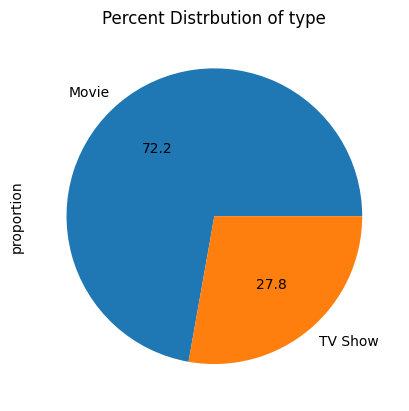

Lets seperate dataframe based on type it will help us impute more targeted 
: movies shape: (145862, 11) tv_show shape : (56148, 11)


In [21]:
data['type'].value_counts( normalize=True).plot(kind='pie' , autopct='%1.1f',title="Percent Distrbution of type")
plt.show()
movies =data[data['type']=='Movie'].copy()
tv_show =data[data['type']=='TV Show'].copy()
print(f"Lets seperate dataframe based on type it will help us impute more targeted \n: movies shape: {movies.shape} tv_show shape : {tv_show.shape}")

## missing value columns wise count

In [22]:
print("Lets deal with missing data : \n")
print("Count of missing data : \n")
display(movies.isna().sum())
display(tv_show.isna().sum())

Lets deal with missing data : 

Count of missing data : 



show_id            0
type               0
title              0
date_added         0
release_year       0
rating             9
duration           3
cast            1331
listed_in          0
country         6199
director        1285
dtype: int64

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             58
duration            0
cast              818
listed_in           0
country          5698
director        49358
dtype: int64

### duration
1. Duration has 3 missing value in movies table
2. Looks like duration value is shifted to rating
3. We will impute duration using adjecent rating values

In [23]:
print("Before imputation : \n")
display(movies[movies['duration'].isna()])
idx =movies[movies['duration'].isna()].index
movies.loc[idx ,'duration']=movies.loc[idx ,'rating']
movies.loc[idx ,'rating']=np.nan
print("After imputation : \n")
display(movies.loc[idx])
print("Number of missing value in duration after imputation : \n")
display(movies[['duration']].isna().sum())

Before imputation : 



,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
126582,s5542,Movie,Louis C.K. 2017,2017-04-04,2017-01-01,74 min,NaN,Louis C.K.,Movies,United States,Louis C.K.
131648,s5795,Movie,Louis C.K.: Hilarious,2016-09-16,2010-01-01,84 min,NaN,Louis C.K.,Movies,United States,Louis C.K.
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,2016-08-15,2015-01-01,66 min,NaN,Louis C.K.,Movies,United States,Louis C.K.


After imputation : 



,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
126582,s5542,Movie,Louis C.K. 2017,2017-04-04,2017-01-01,NaN,74 min,Louis C.K.,Movies,United States,Louis C.K.
131648,s5795,Movie,Louis C.K.: Hilarious,2016-09-16,2010-01-01,NaN,84 min,Louis C.K.,Movies,United States,Louis C.K.
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,2016-08-15,2015-01-01,NaN,66 min,Louis C.K.,Movies,United States,Louis C.K.


Number of missing value in duration after imputation : 



duration    0
dtype: int64

In [24]:


def mode(ser):
    """_summary_

    Args:
        ser (_type_): series

    Returns:
        _type_: if all none return ukn else return mode
    """
    # if all are none dont take none
    if ser.isna().sum()< ser.shape[0]:
        return ser.value_counts().index[0]
    else:
        return 'unk'
    




def impute(data ,column_to_impute , smart_guess_columns ):
    print(f"Imputing {column_to_impute} using {smart_guess_columns}")
    
    # grouping
    replacer_dict =data.groupby(smart_guess_columns)[column_to_impute].apply(mode).to_dict()
    # finding rows that are missing 
    missing_data_df =data[data[column_to_impute].isna()]
    missing_data_index = missing_data_df.index
    # global mode in case to fill key does not match replacer_dict key 
    global_mode=data[column_to_impute].value_counts().index[0]
    print("Before filling missing value")
    display(data.loc[missing_data_index].sample(5))
    # iterate over all the missing rows
    # get values of smart_guess_columns 
    # create key combination and search in replacer_dict
    # if found replace with that value else global mode
    for index,row in missing_data_df.iterrows():
        real_search_key =[]
        for guess_col in smart_guess_columns:
            real_search_key.append(row[guess_col])
        real_search_key= tuple(real_search_key)
        fill_value =replacer_dict.get(real_search_key)
        if fill_value =='unk' or fill_value is None:
            # fill based on global mode 
            fill_value =global_mode
            # print(f" global -- key :{real_search_key} value -- :{fill_value}")
            data.loc[index ,column_to_impute ]=fill_value
        else:
            # print(f" guess -- key :{real_search_key} value -- :{fill_value}")
            data.loc[index ,column_to_impute]=fill_value

        
        
    print("After filling missing value")
    display(data.loc[missing_data_index].sample(5))
    return data 
    


1. imputing `date_added`
2. will use `release_year` as proxy for `date_added` , because typically movies are added to netflix, within `3-6 month` of release but for `older movies` this would not be the case.


In [25]:
to_fill_index = tv_show[tv_show['date_added'].isna()].index
tv_show.loc[to_fill_index ,'date_added']=tv_show.loc[to_fill_index ,'release_year']

1. Imputing `country` 
2. How to guess missing `country` for a movie  better ?
3. `cast` and `director` country should be good proxy for movie location

In [26]:
column_to_impute ='country'
smart_guess_columns =['director' ,'cast']
movies =impute(movies ,column_to_impute , smart_guess_columns )

Imputing country using ['director', 'cast']


Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
172270,s7544,Movie,My Only Mother,2019-03-04,2013-01-01,TV-14,104 min,Nikki Valdez,Comedies,NaN,Wenn V. Deramas
31445,s1277,Movie,M8 - When Death Rescues Life,2021-02-24,2019-01-01,TV-MA,84 min,Fábio Beltrão,International Movies,NaN,Jeferson De
17825,s690,Movie,Mobile Suit Gundam I,2021-06-18,1981-01-01,TV-14,139 min,Yo Inoue,Classic Movies,NaN,Yoshiyuki Tomino
17449,s673,Movie,Mobile Suit Gundam: Char's Counterattack,2021-06-19,1988-01-01,TV-14,120 min,Maria Kawamura,International Movies,NaN,Yoshiyuki Tomino
98766,s4214,Movie,El Potro: Unstoppable,2019-01-04,2018-01-01,TV-MA,122 min,Jimena Barón,Music & Musicals,NaN,Lorena Munoz


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
105711,s4535,Movie,Super Monsters Save Halloween,2018-10-05,2018-01-01,TV-Y,25 min,Kathleen Barr,Children & Family Movies,United States,NaN
16856,s653,Movie,Osuofia in London II,2021-06-22,2004-01-01,TV-14,70 min,Nkem Owoh,International Movies,Nigeria,Kingsley Ogoro
176102,s7734,Movie,Phamous,2019-12-31,2018-01-01,TV-MA,108 min,Jameel Khan,Thrillers,United States,Karan Lalit Butani
673,s27,Movie,Minsara Kanavu,2021-09-21,1997-01-01,TV-PG,147 min,Girish Karnad,Music & Musicals,United States,Rajiv Menon
921,s37,Movie,The Stronghold,2021-09-17,2021-01-01,TV-MA,105 min,Vincent Darmuzey,International Movies,United States,Cédric Jimenez


In [27]:
column_to_impute ='country'
smart_guess_columns =['director' ,'cast']
tv_show =impute(tv_show ,column_to_impute , smart_guess_columns )

Imputing country using ['director', 'cast']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
113624,s4909,TV Show,Goodnight DJ 1,2018-04-27,2016-01-01,TV-14,2 Seasons,Chan Fong,International TV Shows,NaN,NaN
79020,s3285,TV Show,Westside Story,2019-11-15,2003-01-01,TV-14,1 Season,Whyn Wu,International TV Shows,NaN,NaN
77024,s3200,TV Show,Space Jungle,2019-12-01,2016-01-01,TV-Y,2 Seasons,Kim Min-hee,Kids' TV,NaN,NaN
14579,s578,TV Show,Masameer County,2021-07-01,2021-01-01,TV-MA,1 Season,Lama Alfard,International TV Shows,NaN,Malik Nejer
13553,s547,TV Show,You Are My Spring,2021-07-06,2021-01-01,TV-14,1 Season,Kim Myung-jun,International TV Shows,NaN,NaN


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
147676,s6521,TV Show,Comedy High School,2018-07-01,2018-01-01,TV-14,1 Season,Deepak Dutta,TV Comedies,United States,NaN
19457,s772,TV Show,Pretty Guardian Sailor Moon Eternal The Movie,2021-06-03,2021-01-01,TV-14,1 Season,Shizuka Ito,TV Shows,United States,Chiaki Kon
38655,s1597,TV Show,The Great British Baking Show: Holidays,2020-12-04,2020-01-01,TV-MA,3 Seasons,Prue Leith,British TV Shows,United States,NaN
113629,s4909,TV Show,Goodnight DJ 1,2018-04-27,2016-01-01,TV-14,2 Seasons,Z-Chen,TV Horror,United States,NaN
7481,s310,TV Show,Car Masters: Rust to Riches,2021-08-04,2021-01-01,TV-PG,3 Seasons,Shawn Pilot,Reality TV,United States,NaN


1. Imputing `cast` 
2. How to guess missing `cast` for a movie  better ?
3. some `director` have there preference of cast -- they also have long term contract work contract with `cast` 
4. `country` can also help us identify cast 
5. Some `cast` work for specific `listed` movie like work only `PG-13` movies

In [28]:
column_to_impute ='cast'
smart_guess_columns =['director' ,'country'  ,'listed_in']
movies =impute(movies ,column_to_impute , smart_guess_columns )

Imputing cast using ['director', 'country', 'listed_in']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
94151,s3984,Movie,ReMastered: The Miami Showband Massacre,2019-03-22,2019-01-01,TV-MA,71 min,NaN,Documentaries,United States,Stuart Sender
141006,s6234,Movie,Barbecue,2017-08-15,2017-01-01,TV-MA,101 min,NaN,Documentaries,Australia,Matthew Salleh
2045,s92,Movie,The Women and the Murderer,2021-09-09,2021-01-01,TV-14,92 min,NaN,Documentaries,France,Mona Achache
155361,s6866,Movie,Golden Time,2017-11-01,2013-01-01,TV-Y,22 min,NaN,International Movies,Japan,Takuya Inaba
162009,s7135,Movie,Joe Cocker: Mad Dog with Soul,2017-04-01,2017-01-01,TV-14,90 min,NaN,International Movies,United Kingdom,John Edginton


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
104533,s4475,Movie,Santo Cachón,2018-10-26,2018-01-01,TV-14,87 min,Liam Neeson,Comedies,Colombia,NaN
127682,s5603,Movie,Rush: Beyond the Lighted Stage,2017-02-15,2010-01-01,TV-MA,107 min,Liam Neeson,Documentaries,Canada,Scot McFadyen
189936,s8295,Movie,The Fear of 13,2016-06-01,2015-01-01,TV-MA,95 min,Liam Neeson,Documentaries,United Kingdom,David Sington
184895,s8105,Movie,Strike a Pose,2017-04-07,2016-01-01,TV-MA,85 min,Liam Neeson,International Movies,Netherlands,Reijer Zwaan
83375,s3486,Movie,Sturgill Simpson Presents Sound & Fury,2019-09-27,2019-01-01,TV-MA,42 min,Liam Neeson,Anime Features,United States,Shinji Takagi


In [29]:
column_to_impute ='cast'
smart_guess_columns =['director' ,'country'  ,'listed_in']
tv_show =impute(tv_show ,column_to_impute , smart_guess_columns )

Imputing cast using ['director', 'country', 'listed_in']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
196141,s8550,TV Show,The Vietnam War: A Film by Ken Burns and Lynn ...,2018-06-20,2017-01-01,TV-MA,1 Season,NaN,Docuseries,United States,Lynn Novick
54937,s2323,TV Show,Homemade,2020-06-30,2020-01-01,TV-MA,1 Season,NaN,TV Dramas,Chile,NaN
131793,s5823,TV Show,Cocaine,2016-08-01,2005-01-01,TV-14,1 Season,NaN,Docuseries,United Kingdom,NaN
2447,s111,TV Show,Money Heist: From Tokyo to Berlin,2021-09-03,2021-01-01,TV-MA,1 Season,NaN,International TV Shows,United States,Javier Gómez Santander
73511,s3068,TV Show,"Nisman: The Prosecutor, the President, and the...",2020-01-01,2020-01-01,TV-MA,1 Season,NaN,Crime TV Shows,Germany,Justin Webster


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
173590,s7630,TV Show,Nurses Who Kill,2017-08-01,2016-01-01,TV-14,1 Season,David Attenborough,British TV Shows,United Kingdom,NaN
73520,s3068,TV Show,"Nisman: The Prosecutor, the President, and the...",2020-01-01,2020-01-01,TV-MA,1 Season,David Attenborough,International TV Shows,Denmark,Justin Webster
163766,s7177,TV Show,Ken Burns: The Roosevelts: An Intimate History,2017-02-22,2014-01-01,TV-PG,1 Season,Sam Waterston,Docuseries,United States,Ken Burns
170911,s7505,TV Show,Monty Don's French Gardens,2019-07-26,2013-01-01,TV-G,1 Season,David Attenborough,British TV Shows,United Kingdom,Rachel Bell
186841,s8176,TV Show,The 2000s,2019-02-19,2018-01-01,TV-MA,1 Season,David Attenborough,Docuseries,United States,NaN


1. Imputing `director` 
2. How to guess missing `director` for a movie  better ?
3. some `cast` have there preference of `director` -- they also have long term contract work contract with `director` 
4. `country` can also help us identify director 
5. Some `director` direct  specific `listed` movie like work only `PG-13` movies

In [30]:
column_to_impute ='director'
smart_guess_columns =['cast' ,'country'  ,'listed_in']
movies =impute(movies ,column_to_impute , smart_guess_columns )

Imputing director using ['cast', 'country', 'listed_in']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
11714,s484,Movie,Last Summer,2021-07-09,2021-01-01,TV-MA,102 min,Talha Öztürk,Romantic Movies,United States,NaN
77929,s3232,Movie,True: Winter Wishes,2019-11-26,2019-01-01,TV-Y,46 min,Michela Luci,Children & Family Movies,United States,NaN
175092,s7686,Movie,Our Shining Days,2018-07-01,2017-01-01,TV-PG,103 min,Yongxi Liu,Dramas,China,NaN
56480,s2385,Movie,The Show Must Go On: The Queen + Adam Lambert ...,2020-06-15,2019-01-01,TV-MA,85 min,Adam Lambert,Music & Musicals,United Kingdom,NaN
131600,s5790,Movie,"Rafał Banaś, Michał Leja Laugh out Loud",2016-09-19,2016-01-01,TV-MA,64 min,Michał Leja,Stand-Up Comedy,United States,NaN


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
99392,s4254,Movie,Black Mirror: Bandersnatch,2018-12-28,2018-01-01,TV-MA,312 min,Alice Lowe,Sci-Fi & Fantasy,United States,Martin Scorsese
97305,s4138,Movie,Free Rein: Valentine's Day,2019-02-01,2019-01-01,TV-G,51 min,Martin Bobb-Semple,Children & Family Movies,United States,Marek Losey
90931,s3828,Movie,Still LAUGH-IN: The Stars Celebrate,2019-05-14,2019-01-01,TV-MA,61 min,Jeff Ross,Comedies,United States,Martin Scorsese
109271,s4696,Movie,Party Monster: Scratching the Surface,2018-08-17,2018-01-01,TV-14,33 min,Sol Miranda,Comedies,United States,Claire Scanlon
76306,s3173,Movie,Spirit Riding Free: Spirit of Christmas,2019-12-06,2019-01-01,TV-Y7,46 min,Kay Bess,Children & Family Movies,United States,Johane Matte


In [31]:
column_to_impute ='director'
smart_guess_columns =['cast' ,'country'  ,'listed_in']
tv_show =impute(tv_show ,column_to_impute , smart_guess_columns )

Imputing director using ['cast', 'country', 'listed_in']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
38171,s1574,TV Show,The Expanding Universe of Ashley Garcia,2020-12-09,2020-01-01,TV-PG,3 Seasons,Paulina Chávez,Teen TV Shows,United States,NaN
163803,s7183,TV Show,Khaani,2019-08-01,2017-01-01,TV-14,1 Season,Salma Hasan,International TV Shows,Pakistan,NaN
129905,s5700,TV Show,Back to 1989,2016-12-01,2016-01-01,TV-PG,1 Season,Marcus Chang,TV Comedies,Taiwan,NaN
73709,s3077,TV Show,The Bride of Habaek,2020-01-01,2017-01-01,TV-14,1 Season,Lim Ju-hwan,Korean TV Shows,South Korea,NaN
76324,s3174,TV Show,Teasing Master Takagi-san,2019-12-06,2019-01-01,TV-PG,1 Season,M・A・O,International TV Shows,Japan,NaN


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
104358,s4470,TV Show,Fate/EXTRA Last Encore,2018-10-30,2018-01-01,TV-MA,2 Seasons,Kunihiko Yasui,International TV Shows,Japan,Noam Murro
193420,s8425,TV Show,The Ministry of Time,2018-01-28,2017-01-01,TV-MA,3 Seasons,Julián Villagrán,International TV Shows,Spain,Noam Murro
31960,s1297,TV Show,"Hello, Me!",2021-02-18,2021-01-01,TV-14,1 Season,Ji Seung-hyun,TV Comedies,South Korea,Noam Murro
85858,s3588,TV Show,Victim Number 8,2019-08-16,2018-01-01,TV-MA,1 Season,Youssef Bougarouane,TV Action & Adventure,Spain,Noam Murro
193399,s8425,TV Show,The Ministry of Time,2018-01-28,2017-01-01,TV-MA,3 Seasons,Rodolfo Sancho,International TV Shows,Spain,Noam Murro


1. Imputing `rating` 
2. How to guess missing `rating` for a movie  better ?
3. Rating is definetly dependent on `director` , `cast`,  `listed_in`
4. I won't go beyond three columns when making a guess, as it would make the search key too specific, and when inputting the aggregate part, there would be very few values to determine the mode.

In [32]:
column_to_impute ='rating'
smart_guess_columns =['director' ,'cast'  ,'listed_in']
movies =impute(movies ,column_to_impute , smart_guess_columns )

Imputing rating using ['director', 'cast', 'listed_in']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
172018,s7538,Movie,My Honor Was Loyalty,2017-03-01,2015-01-01,NaN,115 min,Giulia Dichiaro,Dramas,Italy,Alessandro Pepe
126582,s5542,Movie,Louis C.K. 2017,2017-04-04,2017-01-01,NaN,74 min,Louis C.K.,Movies,United States,Louis C.K.
172020,s7538,Movie,My Honor Was Loyalty,2017-03-01,2015-01-01,NaN,115 min,Andreas Segeritz,Dramas,Italy,Alessandro Pepe
172016,s7538,Movie,My Honor Was Loyalty,2017-03-01,2015-01-01,NaN,115 min,Francesco Migliore,Dramas,Italy,Alessandro Pepe
172015,s7538,Movie,My Honor Was Loyalty,2017-03-01,2015-01-01,NaN,115 min,Paolo Vaccarino,Dramas,Italy,Alessandro Pepe


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
172017,s7538,Movie,My Honor Was Loyalty,2017-03-01,2015-01-01,TV-MA,115 min,Albrecht Weimer,Dramas,Italy,Alessandro Pepe
135172,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,2017-01-26,2017-01-01,TV-PG,37 min,Oprah Winfrey,Movies,United States,Paul Reubens
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,2016-08-15,2015-01-01,TV-MA,66 min,Louis C.K.,Movies,United States,Louis C.K.
172018,s7538,Movie,My Honor Was Loyalty,2017-03-01,2015-01-01,TV-MA,115 min,Giulia Dichiaro,Dramas,Italy,Alessandro Pepe
135173,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,2017-01-26,2017-01-01,TV-MA,37 min,Ava DuVernay,Movies,United States,Martin Scorsese


In [33]:
column_to_impute ='rating'
smart_guess_columns =['director' ,'cast'  ,'listed_in']
tv_show =impute(tv_show ,column_to_impute , smart_guess_columns )

Imputing rating using ['director', 'cast', 'listed_in']
Before filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
154425,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,NaN,1 Season,Kaito Ishikawa,International TV Shows,Japan,Tensai Okamura
154435,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,NaN,1 Season,Sayaka Ohara,International TV Shows,Japan,Noam Murro
166841,s7313,TV Show,Little Lunch,2018-02-01,2015-01-01,NaN,1 Season,Flynn Curry,Kids' TV,Australia,Noam Murro
154426,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,NaN,1 Season,Hisako Kanemoto,Anime Series,Japan,Noam Murro
154452,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,NaN,1 Season,Janice Kawaye,Anime Series,Japan,Noam Murro


After filling missing value


,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,country,director
166853,s7313,TV Show,Little Lunch,2018-02-01,2015-01-01,TV-MA,1 Season,Heidi Arena,Kids' TV,Australia,Noam Murro
154431,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,TV-MA,1 Season,Kana Asumi,International TV Shows,Japan,Noam Murro
154429,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,TV-14,1 Season,Ai Kayano,International TV Shows,Japan,Tsutomu Mizushima
154432,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,TV-MA,1 Season,Shizuka Ito,Anime Series,Japan,Noam Murro
154425,s6828,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013-01-01,TV-14,1 Season,Kaito Ishikawa,International TV Shows,Japan,Tensai Okamura


In [34]:
print("Count of missing data : \n")
display(movies.isna().sum())
display(tv_show.isna().sum())

Count of missing data : 



show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
cast            0
listed_in       0
country         0
director        0
dtype: int64

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
cast            0
listed_in       0
country         0
director        0
dtype: int64

In [35]:
# movies.to_parquet("movies_preprocessed.zip", index =False)
# tv_show.to_parquet("tv_show_preprocessed.zip", index =False)

In [36]:
# movies = pd.read_parquet("movies_preprocessed.zip")
# tv_show=pd.read_parquet("tv_show_preprocessed.zip")

In [37]:
movies.isna().sum(),tv_show.isna().sum()

(show_id         0
 type            0
 title           0
 date_added      0
 release_year    0
 rating          0
 duration        0
 cast            0
 listed_in       0
 country         0
 director        0
 dtype: int64,
 show_id         0
 type            0
 title           0
 date_added      0
 release_year    0
 rating          0
 duration        0
 cast            0
 listed_in       0
 country         0
 director        0
 dtype: int64)

# there are countries in movies and tv_show data set   which contains empty string imputing it with mode of country

In [38]:
i=movies[movies['country']==''].index
movies.loc[i,'country' ]=movies[['country']].apply(mode)[0]
i=tv_show[tv_show['country']==''].index
tv_show.loc[i,'country' ]=tv_show[['country']].apply(mode)[0]

# Eda 

# Univariate 

In [39]:
def print_basic_stats(series):
    print(f"Number of distinct category {series.shape[0]}")
    print(f"Max occurance category : {series.index[0]} -- {series.iloc[0]}")
    print(f"Min occurance category: {series.index[-1]} -- {series.iloc[-1]}")

def plot_count_point(mov, tv , category , top_n =10):
    mov_cnt =mov[category].value_counts()
    tv_cnt =tv[category].value_counts()

    fig , axes =plt.subplots(1 ,2, figsize =(10 ,8))
    sns.barplot(x=mov_cnt.index[:top_n] , y = mov_cnt[:top_n] , ax= axes[0])
    axes[0].tick_params(labelrotation=90)
    axes[0].set_title("movies")
    sns.barplot(x=tv_cnt.index[:top_n] , y = tv_cnt[:top_n] , ax= axes[1])
    axes[1].tick_params(labelrotation=90)
    axes[1].set_title("Tv show")
    plt.suptitle(f"Count plot of top {top_n} categories in column `{category}`")
    plt.show()
    print("$"*50)
    print("-"*50)
    print(f"Basic stats about movies table and category :'{category}'")
    print_basic_stats(mov_cnt)
    print("-"*50)
    print(f"Basic stats about tv_show table and category :'{category}'")
    print_basic_stats(tv_cnt)
    print("$"*50)

# title

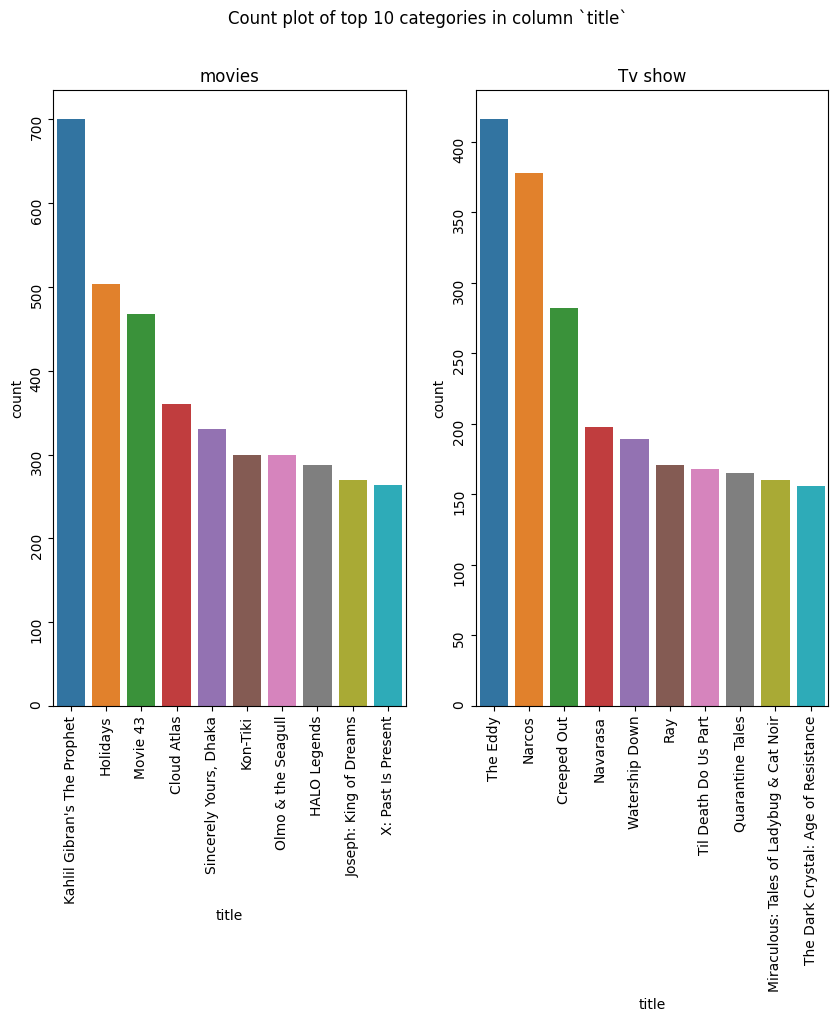

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'title'
Number of distinct category 6130
Max occurance category : Kahlil Gibran's The Prophet -- 700
Min occurance category: Dick Johnson Is Dead -- 1
--------------------------------------------------
Basic stats about tv_show table and category :'title'
Number of distinct category 2676
Max occurance category : The Eddy -- 416
Min occurance category: Qurious Como -- 1
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [40]:
plot_count_point(movies ,tv_show,movies.columns[2])

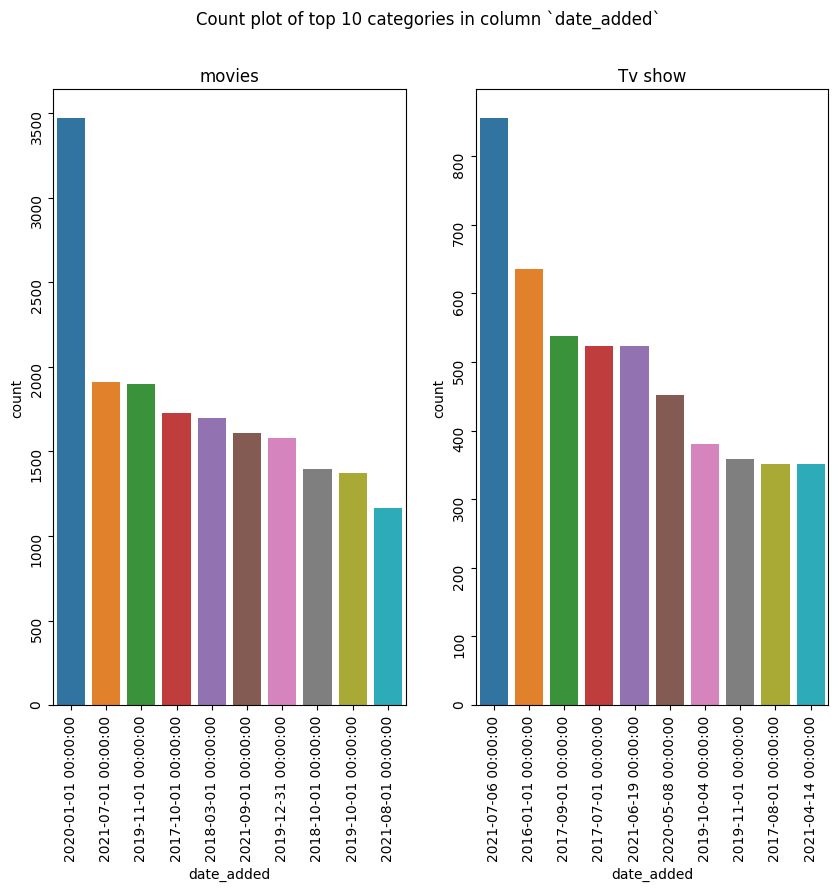

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'date_added'
Number of distinct category 1533
Max occurance category : 2020-01-01 00:00:00 -- 3470
Min occurance category: 2021-09-25 00:00:00 -- 1
--------------------------------------------------
Basic stats about tv_show table and category :'date_added'
Number of distinct category 1018
Max occurance category : 2021-07-06 00:00:00 -- 855
Min occurance category: 2020-08-03 00:00:00 -- 1
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [41]:
plot_count_point(movies ,tv_show,movies.columns[3])

1. most number of movies where added in jan 2020
1. most number of tv shows where added in july 2021

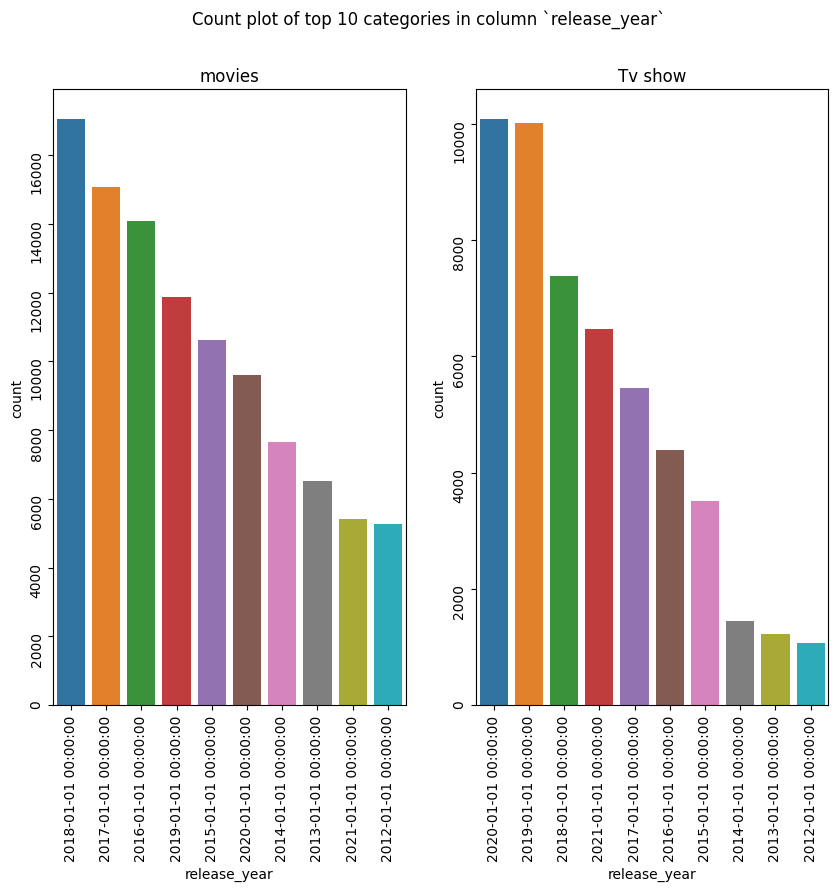

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'release_year'
Number of distinct category 73
Max occurance category : 2018-01-01 00:00:00 -- 17059
Min occurance category: 1946-01-01 00:00:00 -- 2
--------------------------------------------------
Basic stats about tv_show table and category :'release_year'
Number of distinct category 46
Max occurance category : 2020-01-01 00:00:00 -- 10089
Min occurance category: 1945-01-01 00:00:00 -- 1
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [42]:
plot_count_point(movies ,tv_show,movies.columns[4])

1. movies release year range lies from 1946-2018 
2. tv_show release year range lies from 1945-2020

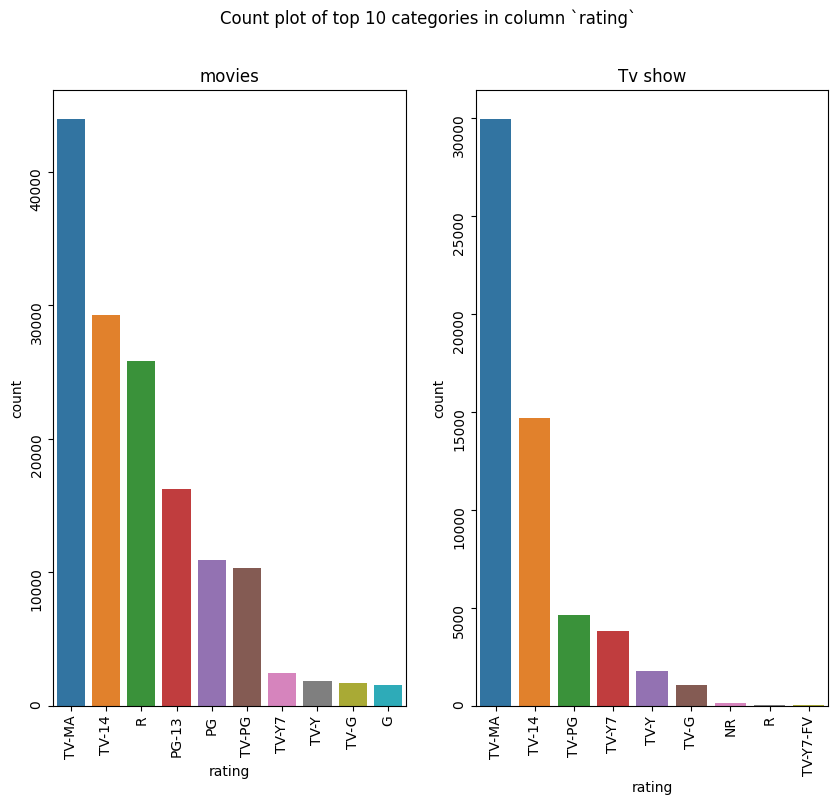

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'rating'
Number of distinct category 14
Max occurance category : TV-MA -- 43972
Min occurance category: TV-Y7-FV -- 62
--------------------------------------------------
Basic stats about tv_show table and category :'rating'
Number of distinct category 9
Max occurance category : TV-MA -- 29952
Min occurance category: TV-Y7-FV -- 24
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [43]:
plot_count_point(movies ,tv_show,movies.columns[5])

1. Tv_show  has less number of categories compared to movies 9 vs 14
2. most and least category for movies and tv_show is same Tv-ma and tv-y7-fv
3. Almost all category has higher count in movies table, which is natural as it has more data

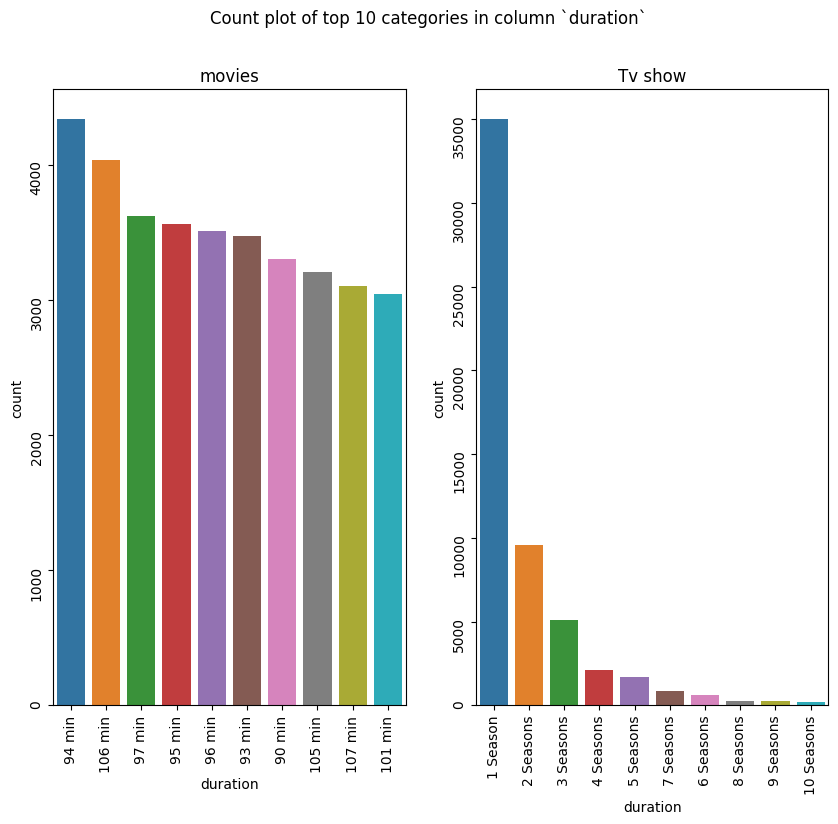

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'duration'
Number of distinct category 205
Max occurance category : 94 min -- 4343
Min occurance category: 11 min -- 2
--------------------------------------------------
Basic stats about tv_show table and category :'duration'
Number of distinct category 15
Max occurance category : 1 Season -- 35035
Min occurance category: 11 Seasons -- 30
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [44]:
plot_count_point(movies ,tv_show,movies.columns[6])

1. looks like for movies most common duration is 94 min and least in 11 min
2. Most tv_show have just 1 season and even run for 11 season 

### Tranforming duration in tv_show and movies to numerical by keeping just number

In [45]:
tv_show['duration']=pd.to_numeric(tv_show['duration'].apply(lambda x : x.split(" " )[0]))
movies['duration']=pd.to_numeric(movies['duration'].apply(lambda x : x.split(" " )[0]))

C:\Users\adity\AppData\Local\Temp\ipykernel_14344\4207412441.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_show['duration'] )


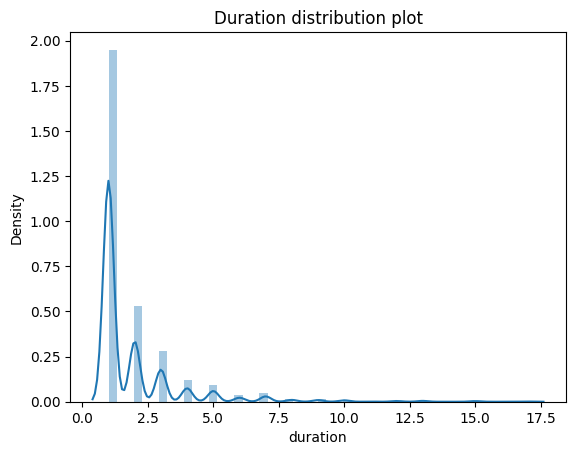

min        1.000000
max       17.000000
mean       1.928101
median     1.000000
std        1.811729
Name: duration, dtype: float64

In [46]:

sns.distplot(tv_show['duration'] )
plt.title("Duration distribution plot")
plt.show()

tv_show['duration'].agg(['min' ,'max' ,'mean' ,'median' ,'std'])

1. From distribution and box plot its clear that most tv_Show end up with just one season, maximum number of season for a tv show is 17.
2. Median is just one 

In [47]:
val=tv_show.query(" duration ==17")['title'].unique()[0]
print(f"tv show : {val} has 17 seasson")

tv show : Grey's Anatomy has 17 seasson


C:\Users\adity\AppData\Local\Temp\ipykernel_14344\1968564047.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies['duration'] ,ax=axis[0])


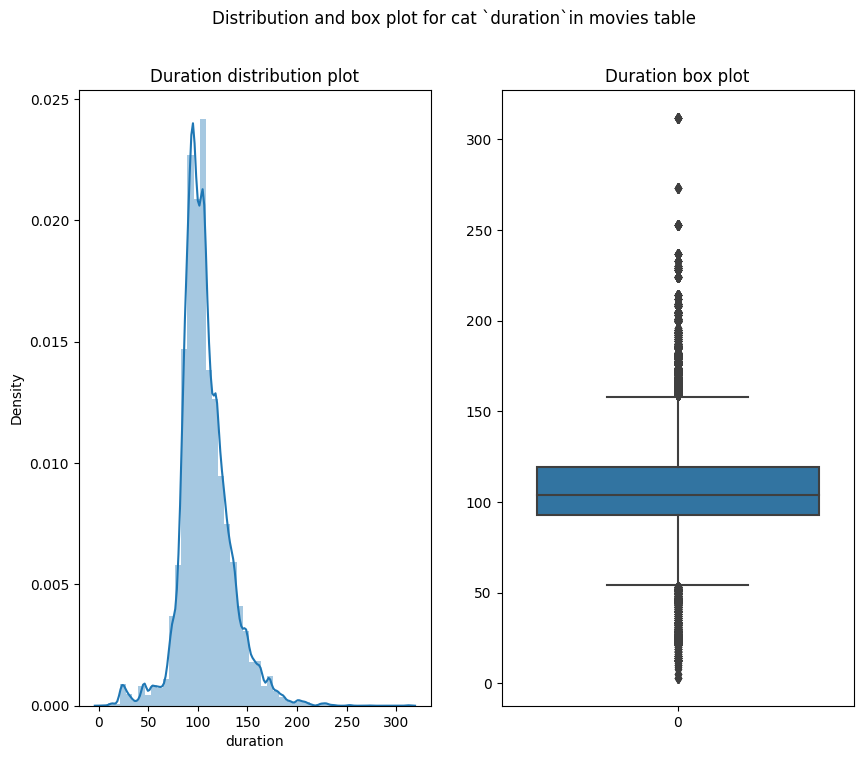

min         3.000000
max       312.000000
mean      106.838258
median    104.000000
std        24.713840
Name: duration, dtype: float64

In [48]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )
sns.distplot(movies['duration'] ,ax=axis[0])
axis[0].set_title("Duration distribution plot")
sns.boxplot(movies['duration'],ax=axis[1])
axis[1].set_title("Duration box plot")
plt.suptitle("Distribution and box plot for cat `duration`in movies table")
plt.show()
movies['duration'].agg(['min' ,'max' ,'mean' ,'median' ,'std'])

1. Movies on an average is 106 mins, median is also near by 104 min 
2. Movies min duaration is 3 min and max is 312 min 
3. Movies with duration above 150 min and less 50 min are outliers

In [49]:
val=movies.query(" duration ==3")['title'].unique()
print(f"movies : {val}  is of 3 min")
val=movies.query(" duration ==312")['title'].unique()
print(f"movies : {val}  is of 312 min")

movies : ['Silent']  is of 3 min
movies : ['Black Mirror: Bandersnatch']  is of 312 min


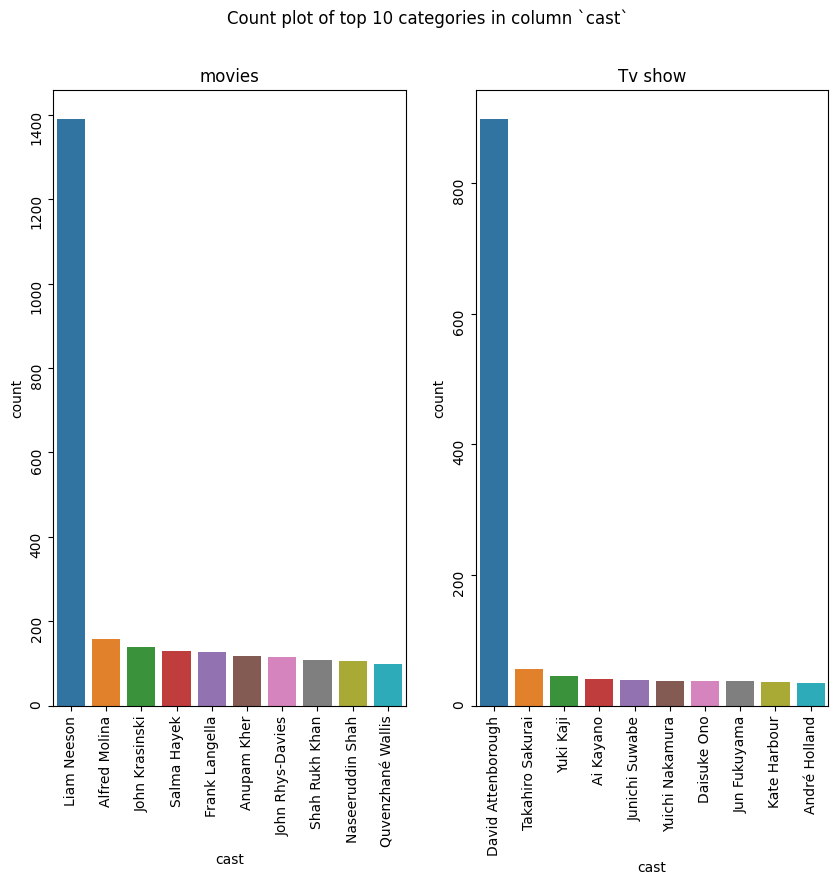

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'cast'
Number of distinct category 25951
Max occurance category : Liam Neeson -- 1390
Min occurance category: Steve Park -- 1
--------------------------------------------------
Basic stats about tv_show table and category :'cast'
Number of distinct category 14863
Max occurance category : David Attenborough -- 898
Min occurance category: Telma Hopkins -- 1
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [50]:
plot_count_point(movies ,tv_show,movies.columns[7])

1. David Attenborough has  worked in most number of tv_show and Liam Neeson has worked in most films

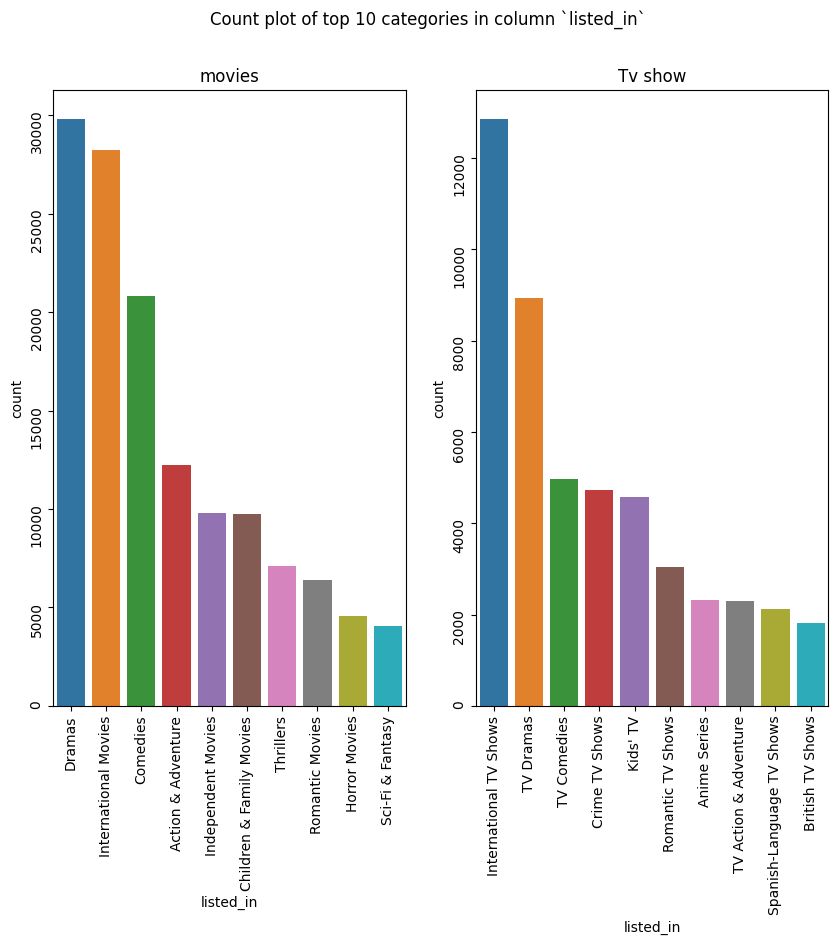

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'listed_in'
Number of distinct category 20
Max occurance category : Dramas -- 29787
Min occurance category: Movies -- 412
--------------------------------------------------
Basic stats about tv_show table and category :'listed_in'
Number of distinct category 22
Max occurance category : International TV Shows -- 12845
Min occurance category: Science & Nature TV -- 157
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [51]:
plot_count_point(movies ,tv_show,movies.columns[8])

1. Most listed movies is of category drama 
2. Most listed tv_show is of category International TV Shows 

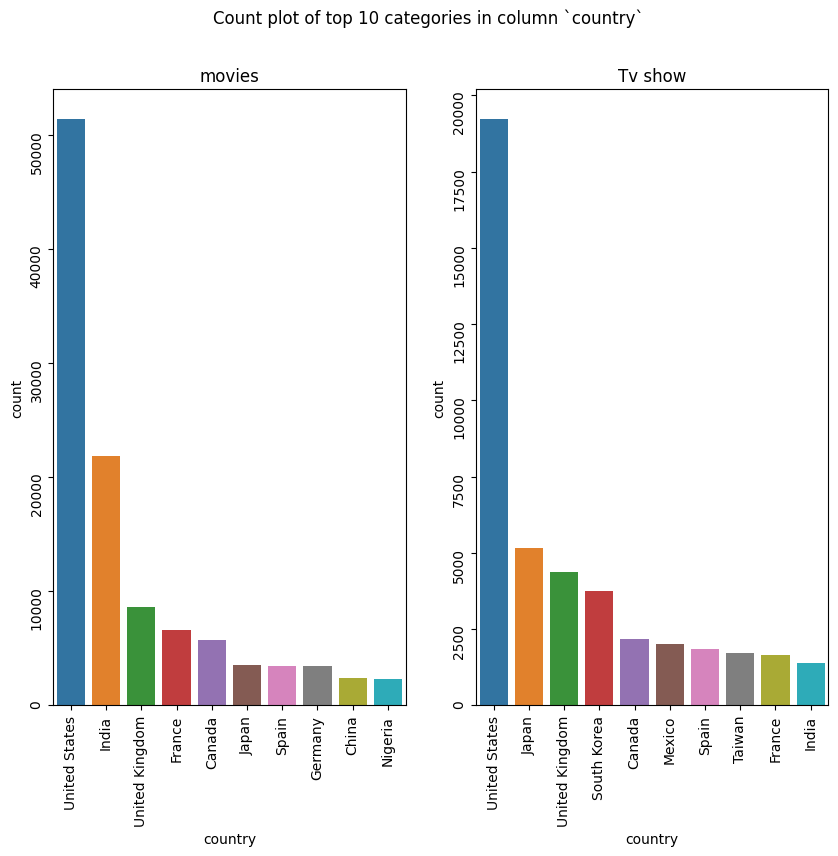

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'country'
Number of distinct category 117
Max occurance category : United States -- 51437
Min occurance category: Uganda -- 1
--------------------------------------------------
Basic stats about tv_show table and category :'country'
Number of distinct category 65
Max occurance category : United States -- 19239
Min occurance category: Uruguay -- 3
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [52]:
plot_count_point(movies ,tv_show,movies.columns[9])

1. Most number of movies/tv_show listed in netflix is from United States
1. second Most number of movies listed in netflix is from India and for tv_show its Japan

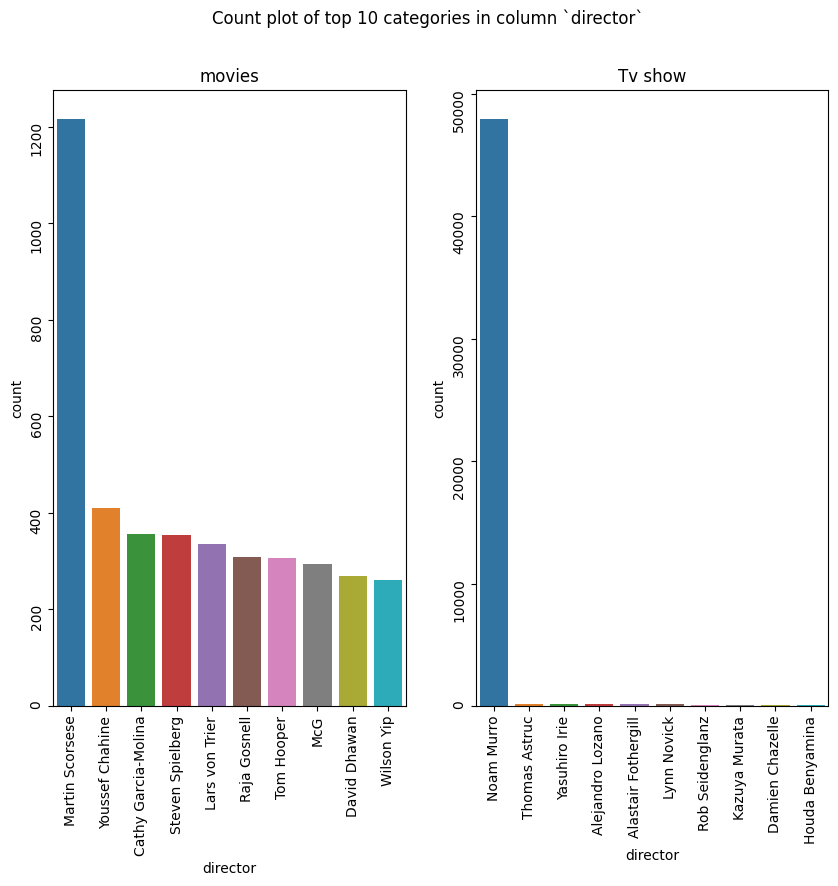

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
--------------------------------------------------
Basic stats about movies table and category :'director'
Number of distinct category 4777
Max occurance category : Martin Scorsese -- 1215
Min occurance category: Kirsten Johnson -- 1
--------------------------------------------------
Basic stats about tv_show table and category :'director'
Number of distinct category 299
Max occurance category : Noam Murro -- 47906
Min occurance category: Jill Bauer -- 1
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [53]:
plot_count_point(movies ,tv_show,movies.columns[10])

1. director who has directed most number of tv_show is Noam Murro, but this can be far from reality as 
tv_show had 49358  missing director so after imputation some categories may become artificially very large.so it would be more safe to say Thomas Astruc most tv_show he is second highest
2. director who has directed most number of movies is Martin Scorsese, but this can be far from reality as 
movies had 1285 missing director so after imputation some categories may become artificially very large.so it would be more safe to say Youssef  most movies he is second highest

# Bivariate analysis 

#### getting date part of date_added

In [54]:
movies['date_added_year']=movies['date_added'].dt.year
movies['date_added_month']=movies['date_added'].dt.month
movies['date_added_week']=movies['date_added'].dt.dayofweek
movies['date_added_quarter']=movies['date_added'].dt.quarter

tv_show['date_added_year']=tv_show['date_added'].dt.year
tv_show['date_added_month']=tv_show['date_added'].dt.month
tv_show['date_added_week']=tv_show['date_added'].dt.dayofweek
tv_show['date_added_quarter']=tv_show['date_added'].dt.quarter

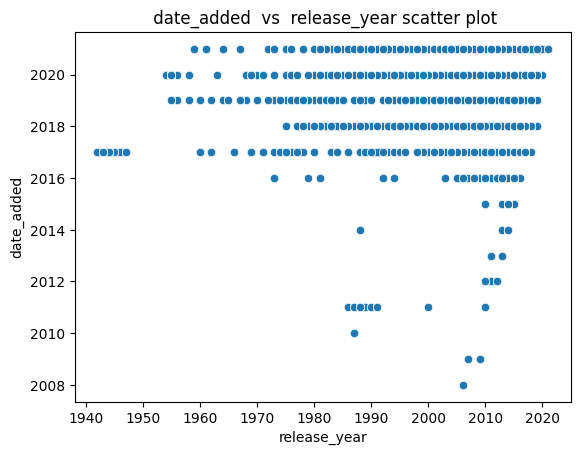

Abs avg time in year for a released movie to get addeded to netflix 
Movies released before 2016 12.699282434773046
Movies released After 2016 0.9861042726626184


In [55]:
sns.scatterplot( y=movies['date_added'].dt.year ,x= movies['release_year'].dt.year)
plt.title(" date_added  vs  release_year scatter plot")
plt.show()
post_2016 =movies[movies['release_year'].dt.year>=2016]
pre_2016 =movies[movies['release_year'].dt.year<2016]

post =np.abs((post_2016['date_added_year'] -post_2016['release_year'].dt.year)).mean()
pre =np.abs((pre_2016['date_added_year'] -pre_2016['release_year'].dt.year)).mean()
print("Abs avg time in year for a released movie to get addeded to netflix ")
print(f"Movies released before 2016 {pre}")
print(f"Movies released After 2016 {post}")

1. most of the movies where added to netflix from 2016 onward 
2. Movies released post 2016 took on avg 1 year to get listed in netflix , Movies released pre 2016 took 12 + year on an average

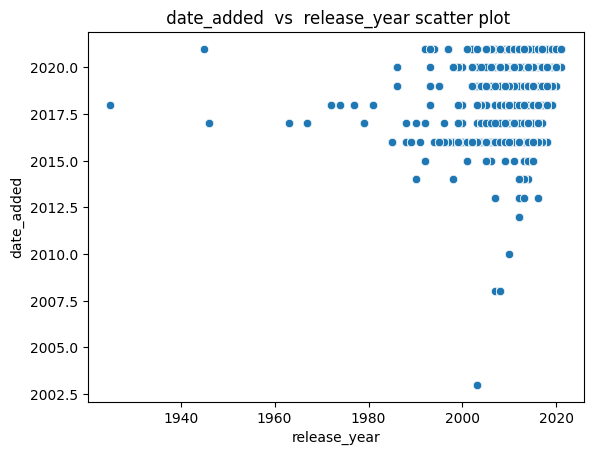

Abs avg time in year for a released movie to get addeded to netflix 
tv_show released before 2015 9.636959222862307
tv_show released After 2015 0.6929273707580083


In [56]:
sns.scatterplot( y=tv_show['date_added'].dt.year ,x= tv_show['release_year'].dt.year)
plt.title(" date_added  vs  release_year scatter plot")
plt.show()
post_2015 =tv_show[tv_show['release_year'].dt.year>=2015]
pre_2015 =tv_show[tv_show['release_year'].dt.year<2015]

post =np.abs((post_2015['date_added_year'] -post_2015['release_year'].dt.year)).mean()
pre =np.abs((pre_2015['date_added_year'] -pre_2015['release_year'].dt.year)).mean()
print("Abs avg time in year for a released movie to get addeded to netflix ")
print(f"tv_show released before 2015 {pre}")
print(f"tv_show released After 2015 {post}")

1. most of the tv_show where added to netflix from 2015 onward 
2. tv_show released post 2015 took on avg 0.7 year to get listed in netflix , tv_show released pre 2015 took 9 + year on an average

In [57]:
temp=movies['release_year'].dt.year.value_counts()
temp=temp/temp.sum()
display(temp[:20])
temp=tv_show['release_year'].dt.year.value_counts()
temp=temp/temp.sum()
display(temp[:20])

release_year
2018    0.116953
2017    0.103310
2016    0.096495
2019    0.081433
2015    0.072754
2020    0.065870
2014    0.052406
2013    0.044713
2021    0.037206
2012    0.036178
2010    0.030165
2009    0.028801
2011    0.027245
2008    0.021726
2007    0.015295
2006    0.015117
2005    0.013931
2004    0.013067
2003    0.011600
2002    0.011058
Name: count, dtype: float64

release_year
2020    0.179686
2019    0.178190
2018    0.131456
2021    0.115178
2017    0.097011
2016    0.078186
2015    0.062620
2014    0.025896
2013    0.021782
2012    0.019181
2010    0.012627
2008    0.011078
2011    0.010668
2009    0.010348
2006    0.005664
1999    0.004951
2007    0.004613
2003    0.004310
2005    0.003651
1997    0.003330
Name: count, dtype: float64

1. 2018  released movies are numerous in platform , netflix should add block buster from other released year too 
2. 2020/2019  released tv_Show are numerous in platform , netflix should good rated tv_show pre 2015 

# date_added based analysis

#### mom movie/tv_show count

Text(0.5, 1.0, 'No of tv_show add each month irrescective of year.')

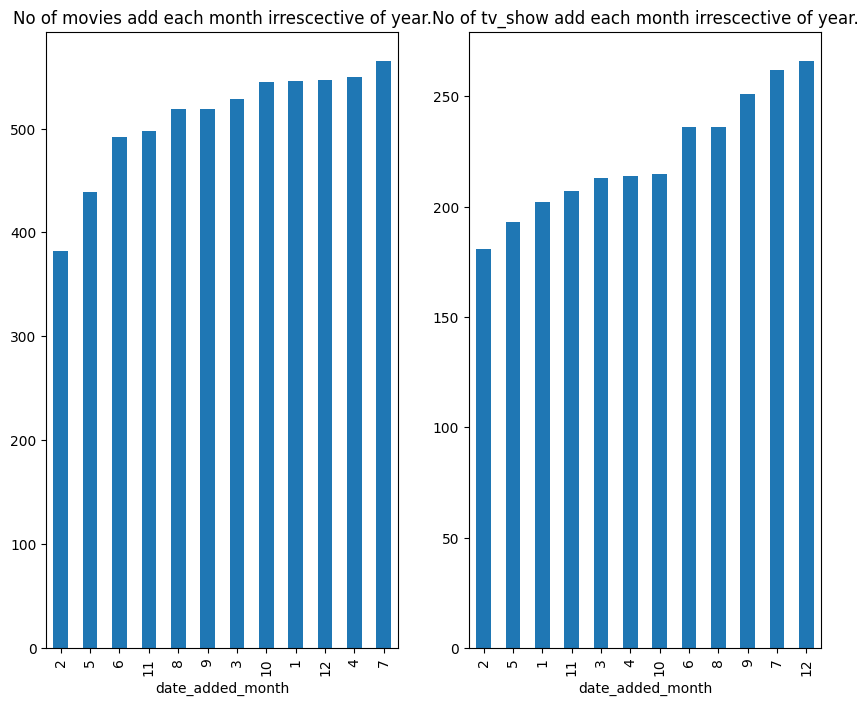

In [58]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )
movies.groupby(['date_added_month'])['show_id'].apply(set).apply(len).sort_values().plot(kind='bar' ,ax=axis[0])
axis[0].set_title("No of movies add each month irrescective of year.")

tv_show.groupby(['date_added_month'])['show_id'].apply(set).apply(len).sort_values().plot(kind='bar' ,ax=axis[1])
axis[1].set_title("No of tv_show add each month irrescective of year.")


1. jul highest  number of `movies` where added to netflix platform
2. feb  lower  number of `movies` where added to netflix platform
3. there is not much difference in count of `movies` added month on month
4. December has highest no `tv_show` added followed by jul to netflix platform

#### qoq movie/tv_show count

Text(0.5, 1.0, 'No of tv show each quarter irrescective of year.')

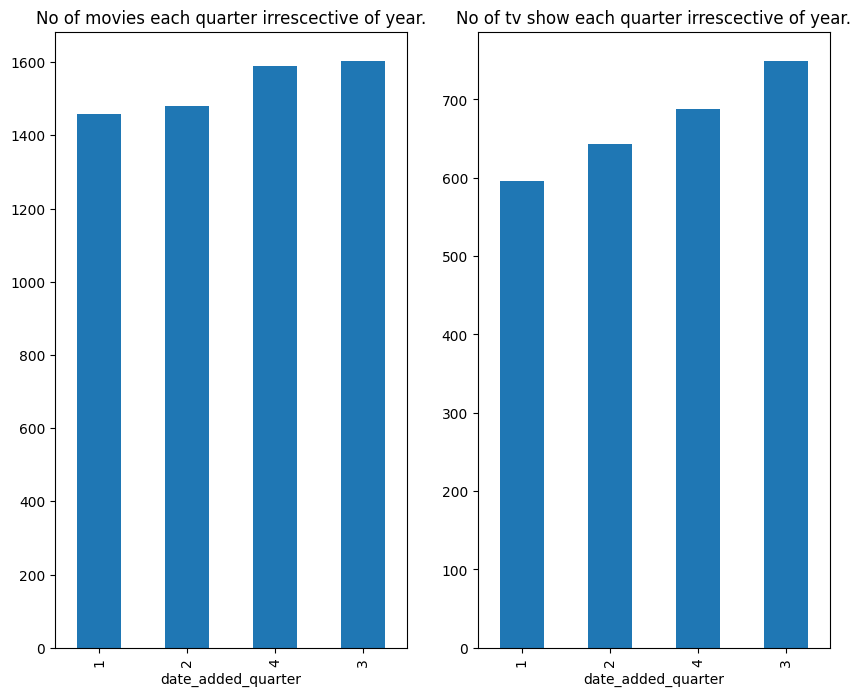

In [59]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )
movies.groupby(['date_added_quarter'])['show_id'].apply(set).apply(len).sort_values().plot(kind='bar', ax=axis[0])
axis[0].set_title("No of movies each quarter irrescective of year.")

tv_show.groupby(['date_added_quarter'])['show_id'].apply(set).apply(len).sort_values().plot(kind='bar', ax=axis[1])
axis[1].set_title("No of tv show each quarter irrescective of year.")



1. q3 highest no of movies/tv_show are added followed by q4
2. it looks like first half of the year less no of movies/tv_show are added compared to 2nd half year


#### wow movie/tv_show count

Text(0.5, 1.0, 'No of tv_show weekly quarter irrescective of year ')

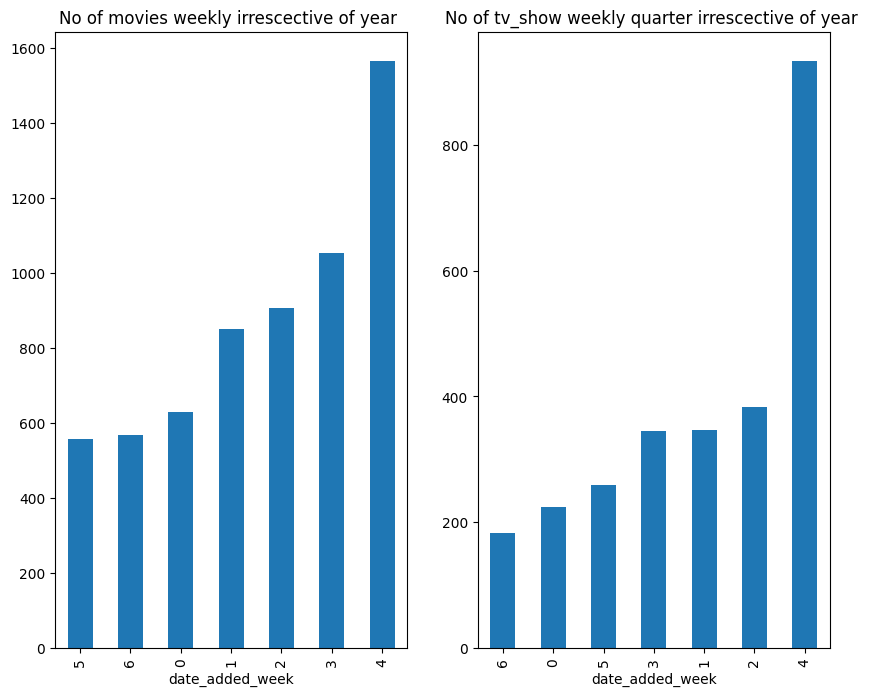

In [60]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )
movies.groupby(['date_added_week'])['show_id'].apply(set).apply(len).sort_values().plot(kind='bar' ,ax= axis[0])
axis[0].set_title("No of movies weekly irrescective of year ")

tv_show.groupby(['date_added_week'])['show_id'].apply(set).apply(len).sort_values().plot(kind='bar' ,ax= axis[1])
axis[1].set_title("No of tv_show weekly quarter irrescective of year ")

1. friday most number of `movies` are added followed by thrushday 
2. least  number of `movies` are added on saturday followed by sunday 
3. friday most number of `tv_Show` are added followed by wednesday 
4. least  number of `tv_Show` are added on sunday followed by monday

#### heatmap
1. year vs month
2. year vs quarter
3. year vs week

Text(0.5, 1.0, 'No of tv_show added given month and year')

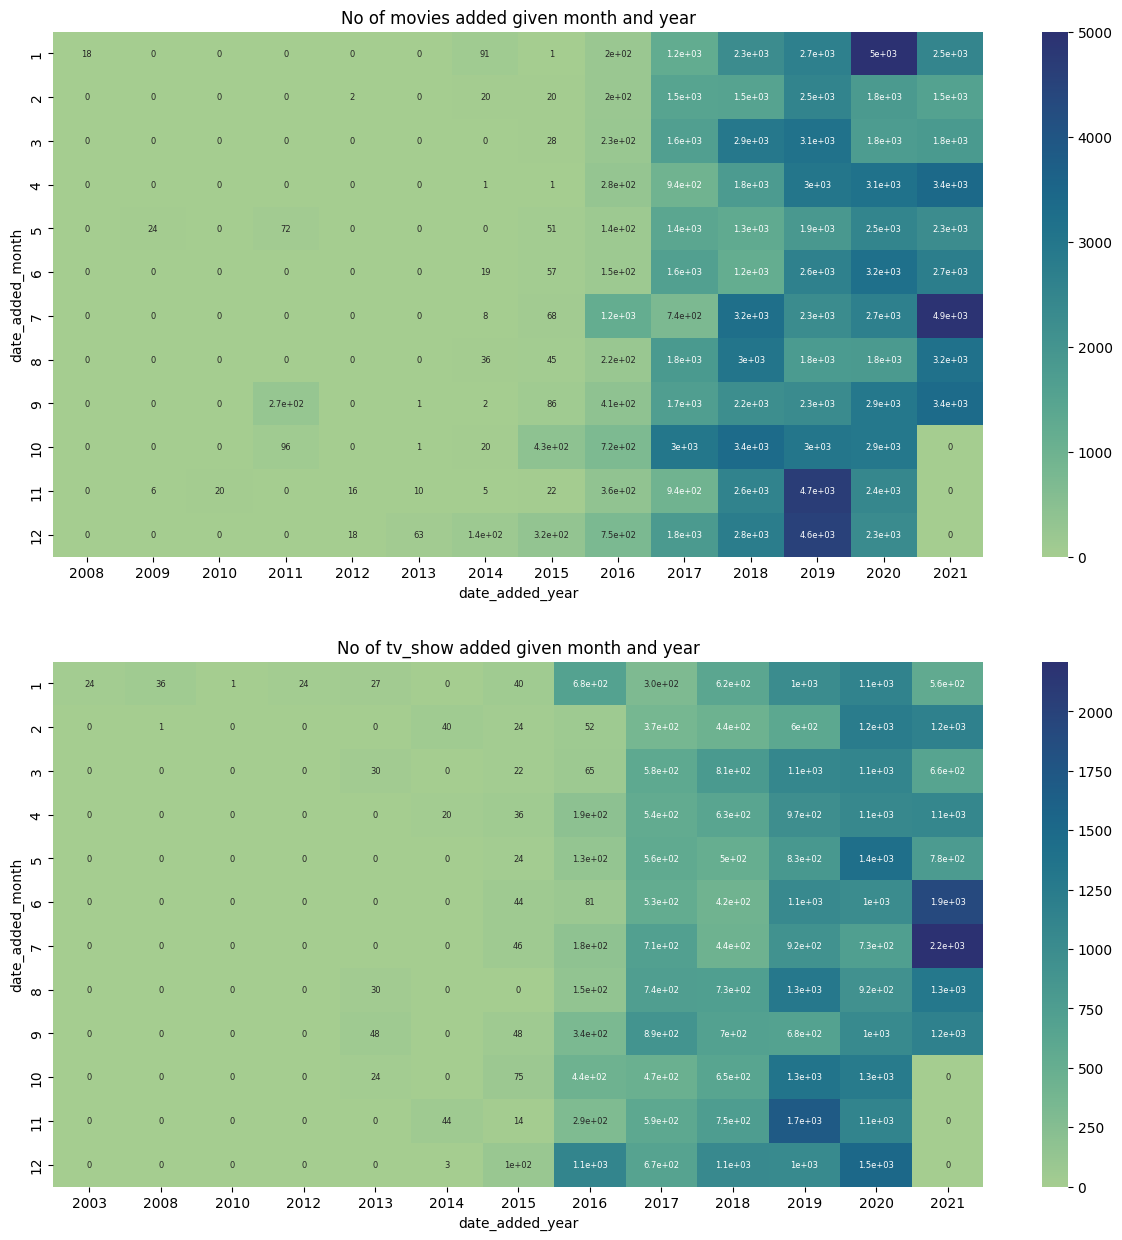

In [61]:
m=movies.groupby('date_added_year')['date_added_month'].value_counts().unstack().fillna(0)[list(range(1,13))].T
t=tv_show.groupby('date_added_year')['date_added_month'].value_counts().unstack().fillna(0)[list(range(1,13))].T
fig , axis =plt.subplots(2,1,figsize =(15,15) )
sns.heatmap(m ,annot=True ,cmap="crest", annot_kws={"fontsize":6} , ax=axis[0])
axis[0].set_title("No of movies added given month and year")
sns.heatmap(t,annot=True ,cmap="crest", annot_kws={"fontsize":6} , ax=axis[1])
axis[1].set_title("No of tv_show added given month and year")

1. For jan-2020 most very `movies` where added to netflix  
2. In 2019 nov,december had higher `movies` uploads then rest of the months 
3. In 2021 july had higher `movies` uploads then rest of the months.
4. For july-2021 most very `tv_show` where added to netflix  
5. In 2019 oct, nov had higher `tv_show` uploads then rest of the months 
6. In 2020 dec had higher `tv_show` uploads then rest of the months .

Text(0.5, 1.0, 'No of tv_show added given quarter and year')

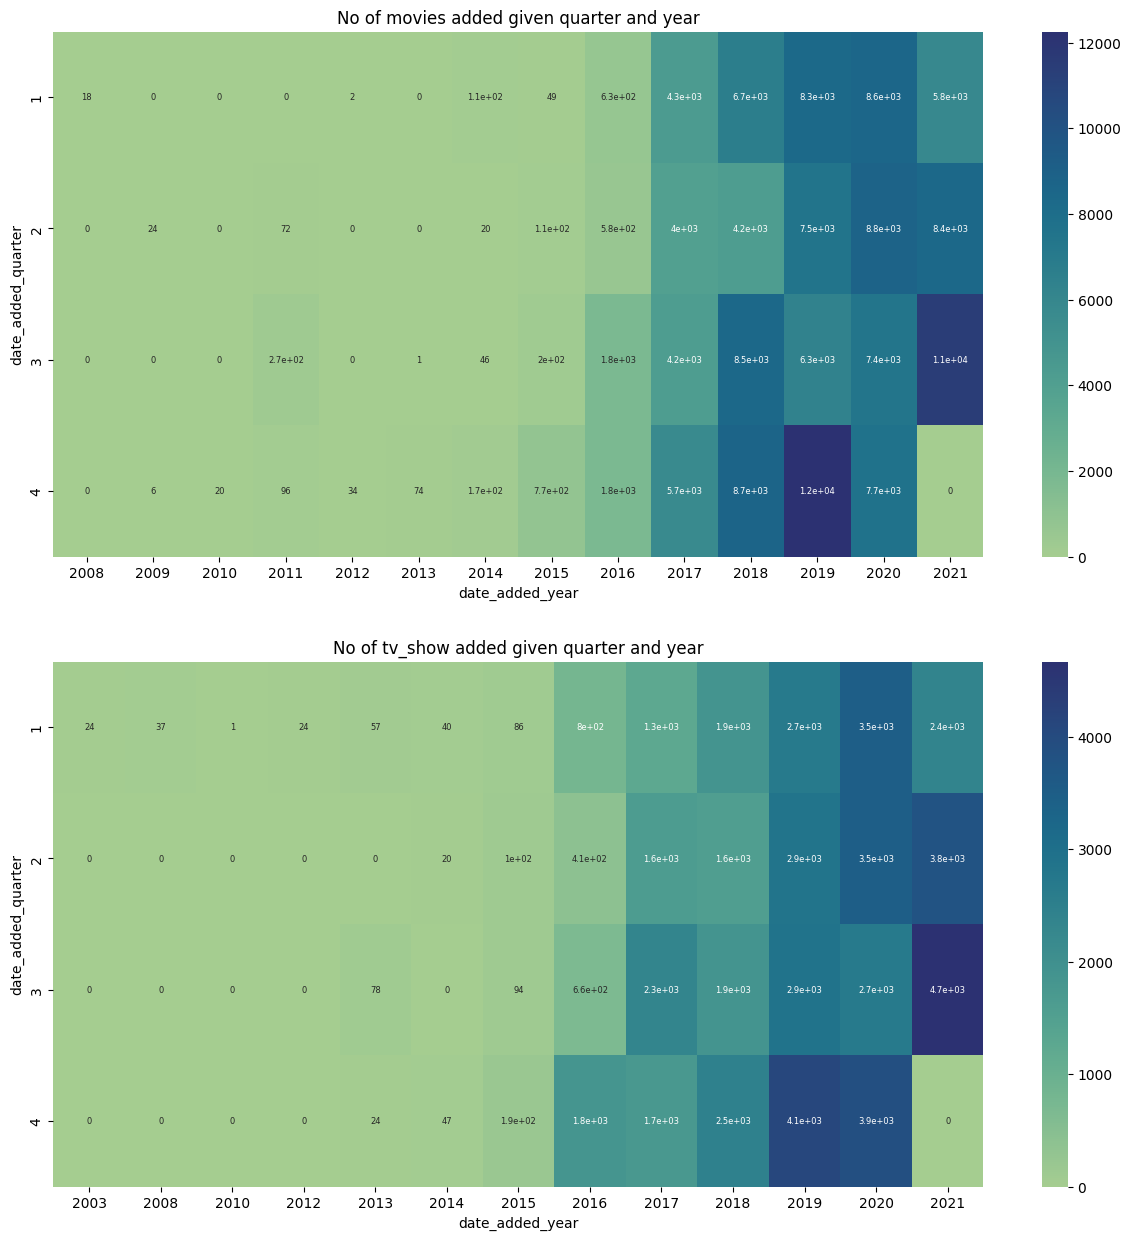

In [62]:
m=movies.groupby('date_added_year')['date_added_quarter'].value_counts().unstack().fillna(0)[list(range(1,5))].T
t=tv_show.groupby('date_added_year')['date_added_quarter'].value_counts().unstack().fillna(0)[list(range(1,5))].T
fig , axis =plt.subplots(2,1,figsize =(15,15) )
sns.heatmap(m ,annot=True ,cmap="crest", annot_kws={"fontsize":6} , ax=axis[0])
axis[0].set_title("No of movies added given quarter and year")
sns.heatmap(t,annot=True ,cmap="crest", annot_kws={"fontsize":6} , ax=axis[1])
axis[1].set_title("No of tv_show added given quarter and year")

1. most movies/tv_show are uploaded in q3 and q4

Text(0.5, 1.0, 'No of tv_show added given dayofweek and year')

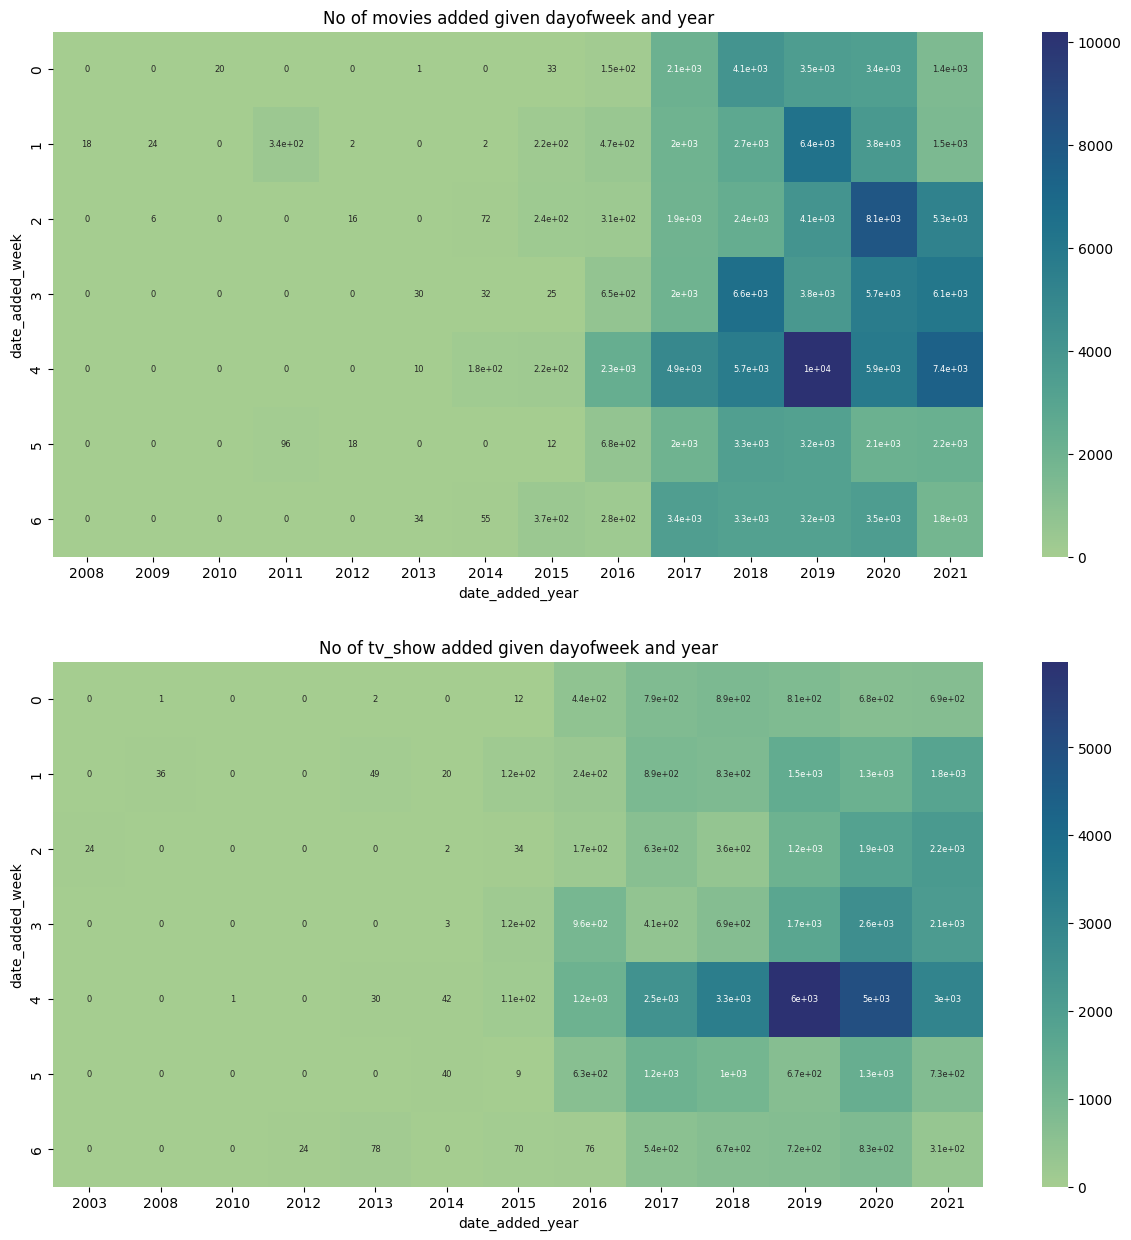

In [63]:
m=movies.groupby('date_added_year')['date_added_week'].value_counts().unstack().fillna(0)[list(range(0,7))].T
t=tv_show.groupby('date_added_year')['date_added_week'].value_counts().unstack().fillna(0)[list(range(0,7))].T
fig , axis =plt.subplots(2,1,figsize =(15,15) )
sns.heatmap(m ,annot=True ,cmap="crest", annot_kws={"fontsize":6} , ax=axis[0])
axis[0].set_title("No of movies added given dayofweek and year")
sns.heatmap(t,annot=True ,cmap="crest", annot_kws={"fontsize":6} , ax=axis[1])
axis[1].set_title("No of tv_show added given dayofweek and year")

1. It can be seen that most movies/tv_show are uploaded on tuesday -friday
and least on saturday -sunday

# How has the number of movies released per year changed over the last 20-30 years

Movies per year release count


release_year
1942    2
1943    3
1944    3
1945    3
1946    1
Name: show_id, dtype: int64

Movies per stats


min         1.000000
max       767.000000
mean       83.986301
median     12.000000
Name: show_id, dtype: float64

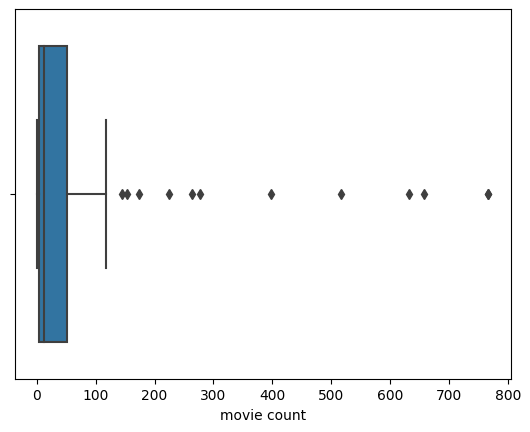

C:\Users\adity\AppData\Local\Temp\ipykernel_14344\1982573309.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=movie_release_per_year)


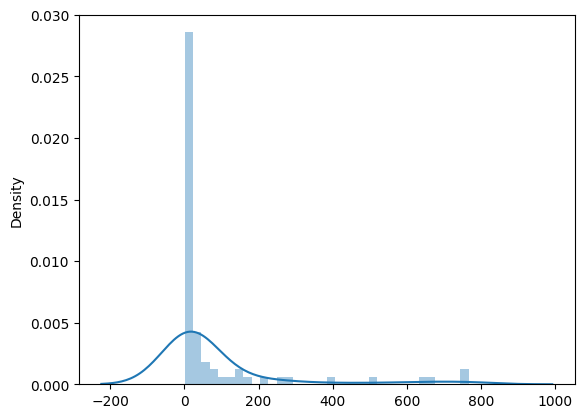

In [64]:
print("Movies per year release count")
movie_release_per_year =movies.groupby(movies['release_year'].dt.year)['show_id'].apply(set).apply(len)
display(movie_release_per_year.head(5))
print("Movies per stats")
display(movie_release_per_year.agg(['min' ,'max' ,'mean' ,'median']))
sns.boxplot(x=movie_release_per_year)
plt.xlabel("movie count")
plt.show()
sns.distplot(x=movie_release_per_year)
plt.show()

1. for year [1946, 1947, 1959, 1961, 1963, 1966] only 1 movies where released which is listed in netflix 
2. for year [2017, 2018] highest no of movie where released 767  which is listed in netflix 
3. Median is just 12 release per year and mean is 83
4. year range is from 1942 -2021 
5. movie count roughly above 120 -130 are outliers 
6. count is right skewed some large value is pulling mean to higher value

#### lets look at last 30 release year

min        20.000000
max       767.000000
mean      195.366667
median     78.000000
Name: show_id, dtype: float64

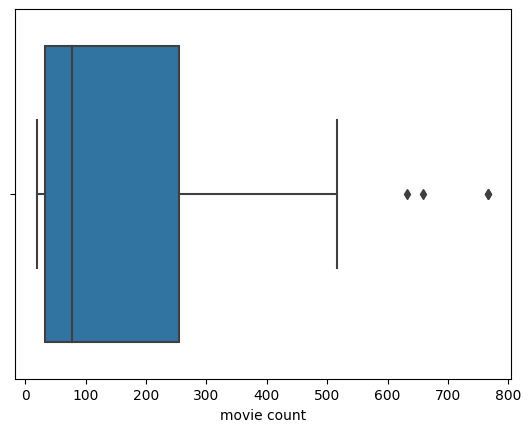

C:\Users\adity\AppData\Local\Temp\ipykernel_14344\1755394636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=movie_release_per_year_last_30)


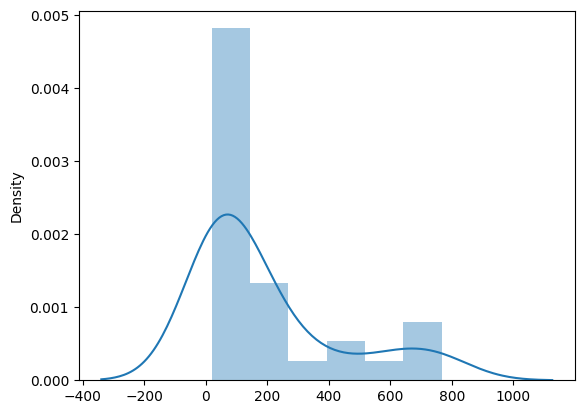

In [65]:
movie_release_per_year_last_30 = movie_release_per_year.sort_index().iloc[-30:]
display(movie_release_per_year_last_30.agg(['min' ,'max' ,'mean' ,'median']))
sns.boxplot(x=movie_release_per_year_last_30)
plt.xlabel("movie count")
plt.show()
sns.distplot(x=movie_release_per_year_last_30)
plt.show()

1. Median is 78 release per year and mean is 195
2. movie count roughly above 600 are outliers
3. In the last 30 years movie release rate has inceased  

### tv_show per year release count

tv_show per year release count


release_year
1925    1
1945    1
1946    1
1963    1
1967    1
Name: show_id, dtype: int64

tv_show per stats


min         1.000000
max       436.000000
mean       58.173913
median      4.000000
Name: show_id, dtype: float64

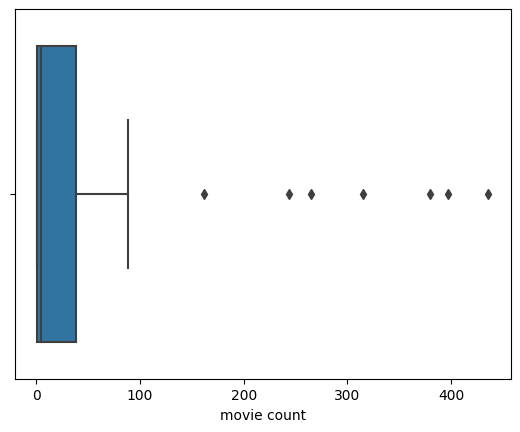

C:\Users\adity\AppData\Local\Temp\ipykernel_14344\3651137249.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=tv_release_per_year)


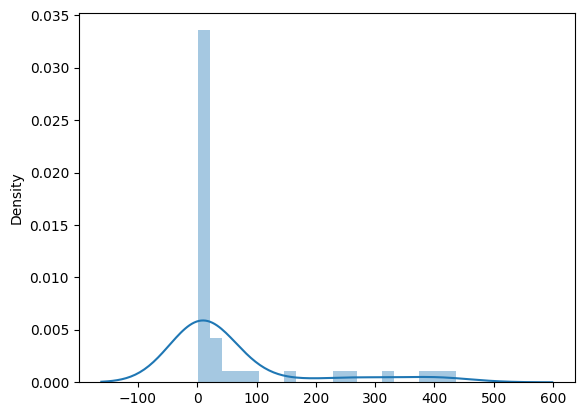

In [66]:
print("tv_show per year release count")
tv_release_per_year =tv_show.groupby(tv_show['release_year'].dt.year)['show_id'].apply(set).apply(len)
display(tv_release_per_year.head(5))
print("tv_show per stats")
display(tv_release_per_year.agg(['min' ,'max' ,'mean' ,'median']))
sns.boxplot(x=tv_release_per_year)
plt.xlabel("movie count")
plt.show()
sns.distplot(x=tv_release_per_year)
plt.show()

1. for year [1925, 1945, 1946, 1963, 1967, 1972, 1974, 1977, 1979, 1981, 1985, 1989,1991]
    only 1 tv_show where released which is listed in netflix 
2. for year [2020] highest no of tv_show where released 436  which is listed in netflix 
3. Median is just 4 release per year and mean is 58.17
4. year range is from 1924 -2021 
5. movie count roughly above 180 -200 are outliers 
6. count is right skewed some large value is pulling mean to higher value

<!-- 1. for year [1946, 1947, 1959, 1961, 1963, 1966] only 1 movies where released which is listed in netflix 
2. for year [2017, 2018] highest no of movie where released 767  which is listed in netflix 
3. Median is just 12 release per year and mean is 83
4. year range is from 1942 -2021 
5. movie count roughly above 120 -130 are outliers 
6. count is right skewed some large value is pulling mean to higher value -->

min         2.000000
max       436.000000
mean       88.533333
median     14.000000
Name: show_id, dtype: float64

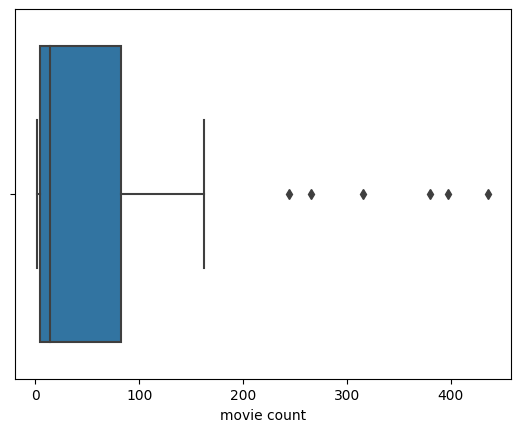

C:\Users\adity\AppData\Local\Temp\ipykernel_14344\3245187686.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=tv_release_per_year_last_30)


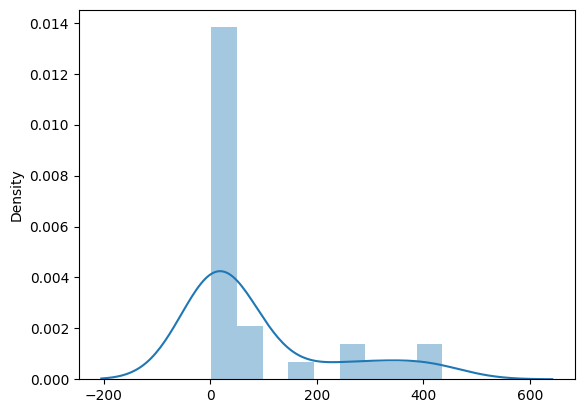

In [67]:
tv_release_per_year_last_30 = tv_release_per_year.sort_index().iloc[-30:]
display(tv_release_per_year_last_30.agg(['min' ,'max' ,'mean' ,'median']))
sns.boxplot(x=tv_release_per_year_last_30)
plt.xlabel("movie count")
plt.show()
sns.distplot(x=tv_release_per_year_last_30)
plt.show()

1. Median is 14 release per year and mean is 88
2. tv_show count roughly above 250 are outliers
3. In the last 30 years tv_show release rate has inceased  

## Mapping rating 'Adults', 'Teens', 'Older Kids', 'Kids'

In [68]:

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

<Axes: title={'center': 'target age distribution'}, xlabel='target_ages'>

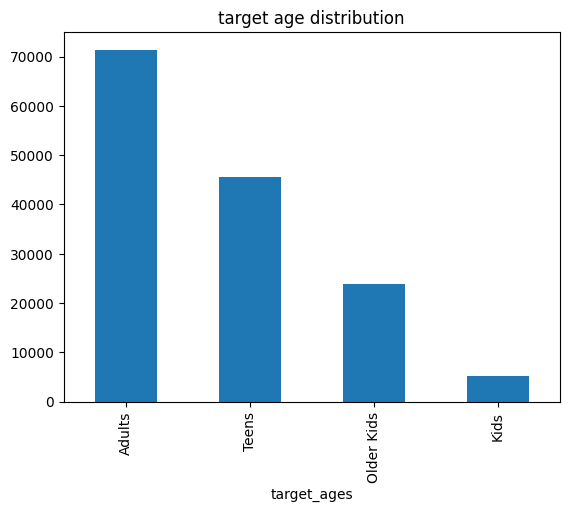

In [69]:
movies['target_ages'] = movies['rating'].replace(ratings_ages)
movies['target_ages'].value_counts().plot(kind='bar' ,title='target age distribution')

<Axes: title={'center': 'target age distribution'}, xlabel='target_ages'>

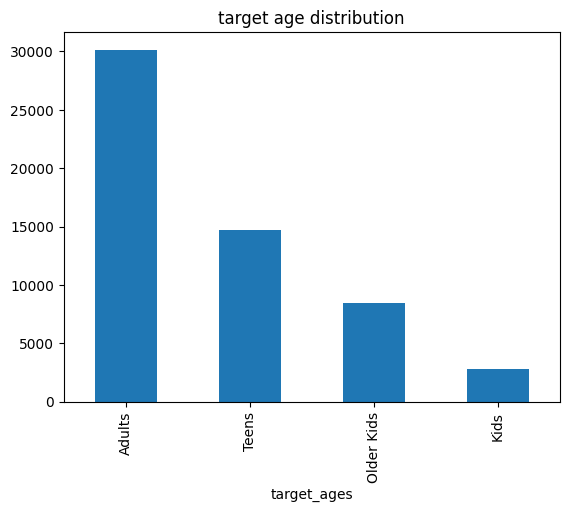

In [70]:
tv_show['target_ages'] = tv_show['rating'].replace(ratings_ages)
tv_show['target_ages'].value_counts().plot(kind='bar' ,title='target age distribution')

# distribution of movies added per target_age and date_added_year

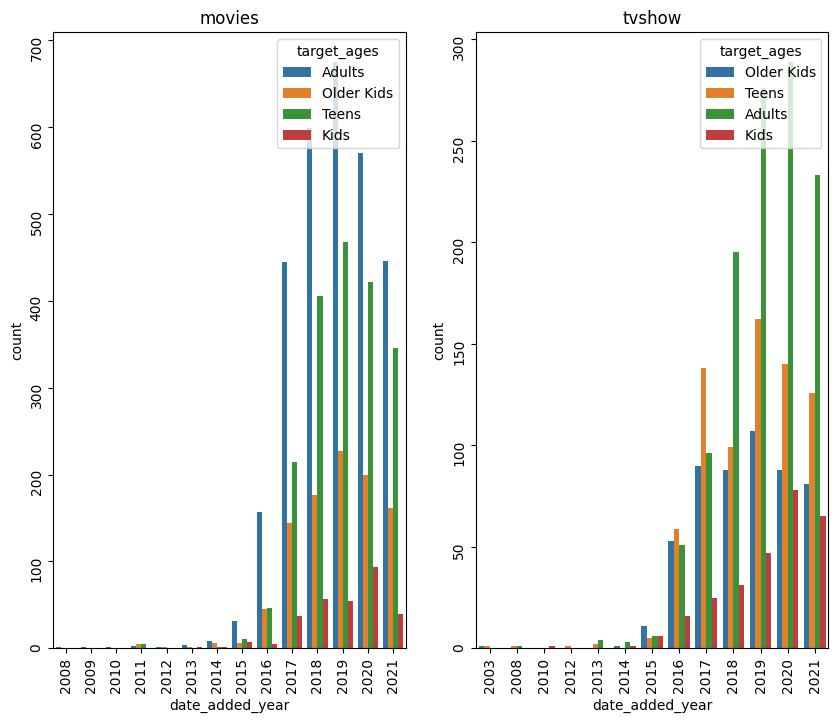

In [71]:
per_year_mov_cat=movies.groupby(['date_added_year' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()
per_year_tv_cat=tv_show.groupby(['date_added_year' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()
fig , axis =plt.subplots(1,2 , figsize=(10,8))
sns.barplot(data =per_year_mov_cat , x='date_added_year' ,y='count' , hue='target_ages' , ax=axis[0])

axis[0].tick_params(labelrotation=90)
axis[0].set_title("movies")
sns.barplot(data =per_year_tv_cat , x='date_added_year' ,y='count' , hue='target_ages' , ax=axis[1])
axis[1].tick_params(labelrotation=90)
axis[1].set_title("tvshow")
plt.show()

1. There are more number of adult films/tv_show addeed each year compared to other category fowlled by teen
2. in 2020 highest no of adult tv show addeed (289) for movies it was 2019  count 675
3. Adult and teen movie popularity is growing year on year, 
4. in tv_show section kids section popularity is increasing yoy, so netflix can add more kids tv show

# top cast based on target_ages

In [72]:
per_traget_mov_cast=movies.groupby(['cast' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()
per_traget_tv_cast=tv_show.groupby(['cast' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()

In [73]:
for  target in per_traget_mov_cast['target_ages'].unique():
    print(f"top 5 cast for movies based on target_ages: `{target}`")
    display(per_traget_mov_cast[per_traget_mov_cast['target_ages']==target].sort_values(by='count' , ascending =False).head(5))

top 5 cast for movies based on target_ages: `Adults`


,cast,target_ages,count
17058,Liam Neeson,Adults,182
4458,Bruce Willis,Adults,15
12357,James Franco,Adults,13
23833,Ramsey Nouah,Adults,11
25790,Samuel L. Jackson,Adults,11


top 5 cast for movies based on target_ages: `Older Kids`


,cast,target_ages,count
17060,Liam Neeson,Older Kids,88
14707,Julie Tejwani,Older Kids,25
25229,Rupa Bhimani,Older Kids,24
23718,Rajesh Kava,Older Kids,21
13362,Jigna Bhardwaj,Older Kids,19


top 5 cast for movies based on target_ages: `Teens`


,cast,target_ages,count
17061,Liam Neeson,Teens,137
2534,Anupam Kher,Teens,27
26565,Shah Rukh Khan,Teens,26
15095,Kareena Kapoor,Teens,20
1572,Amitabh Bachchan,Teens,19


top 5 cast for movies based on target_ages: `Kids`


,cast,target_ages,count
17059,Liam Neeson,Kids,33
1836,Andrea Libman,Kids,15
7588,Diana Kaarina,Kids,11
30311,Vincent Tong,Kids,10
959,Alessandro Juliani,Kids,10


1. Ignoring Liam Neeson as top cast because it can come at top due to imputation
2. for adult section Bruce Willis is top cast with 15 movies 
3. for Older Kids Julie Tejwani	is top cast with 25 movies
4. for Teens Anupam Kher		is top cast with 27 movies
5. for Kids Andrea Libman	is top with cast	15movies
6. Netflix can add more Bruce Willis movie for Adult target age 
7. Netflix can add more Anupam Kher,Shah Rukh Khan	movie for teen target age

In [74]:
for  target in per_traget_tv_cast['target_ages'].unique():
    print(f"top 5 cast for tv_show based on target_ages: `{target}`")
    display(per_traget_tv_cast[per_traget_tv_cast['target_ages']==target].sort_values(by='count' , ascending =False).head(5))

top 5 cast for tv_show based on target_ages: `Kids`


,cast,target_ages,count
3454,David Attenborough,Kids,42
10582,Michela Luci,Kids,9
6275,Jamie Watson,Kids,6
15600,Vincent Tong,Kids,6
4380,Eric Peterson,Kids,6


top 5 cast for tv_show based on target_ages: `Adults`


,cast,target_ages,count
3453,David Attenborough,Adults,158
14671,Takahiro Sakurai,Adults,14
7462,Jun Fukuyama,Adults,11
16200,Yuki Kaji,Adults,10
16094,Yoshimasa Hosoya,Adults,9


top 5 cast for tv_show based on target_ages: `Teens`


,cast,target_ages,count
3456,David Attenborough,Teens,77
277,Ai Kayano,Teens,11
14825,Tay Ping Hui,Teens,9
14673,Takahiro Sakurai,Teens,9
7510,Junichi Suwabe,Teens,9


top 5 cast for tv_show based on target_ages: `Older Kids`


,cast,target_ages,count
3455,David Attenborough,Older Kids,86
5201,Grey Griffin,Older Kids,8
8124,Kevin Michael Richardson,Older Kids,8
1313,Ashleigh Ball,Older Kids,7
15601,Vincent Tong,Older Kids,7


1. Ignoring David Attenborough as top cast because it can come at top due to imputation
2. for adult section Takahiro Sakura is top cast with 14 tv show 
3. for Older Kids Grey Griffin	is top cast with  8 tv show
4. for Teens Ai Kayano		is top cast with  11 tv show
5. for Kids Michela Luci	is top cast with	9 tv show

# top director based on target_age

In [75]:
per_traget_mov_dir=movies.groupby(['director' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()
per_traget_tv_dir=tv_show.groupby(['director' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()

In [76]:
for  target in per_traget_mov_dir['target_ages'].unique():
    print(f"top 5 cast for movies based on target_ages: `{target}`")
    display(per_traget_mov_dir[per_traget_mov_dir['target_ages']==target].sort_values(by='count' , ascending =False).head(5))

top 5 cast for movies based on target_ages: `Teens`


,director,target_ages,count
3173,Martin Scorsese,Teens,21
5163,Umesh Mehra,Teens,8
816,Cathy Garcia-Molina,Teens,7
4604,Shalini Kantayya,Teens,7
2770,Kunle Afolayan,Teens,7


top 5 cast for movies based on target_ages: `Adults`


,director,target_ages,count
3170,Martin Scorsese,Adults,66
2051,Jan Suter,Adults,20
4111,Raúl Campos,Adults,18
3084,Marcus Raboy,Adults,13
4601,Shalini Kantayya,Adults,12


top 5 cast for movies based on target_ages: `Older Kids`


,director,target_ages,count
3172,Martin Scorsese,Older Kids,31
4051,Rajiv Chilaka,Older Kids,20
4852,Suhas Kadav,Older Kids,15
3967,Prakash Satam,Older Kids,8
4256,Robert Rodriguez,Older Kids,7


top 5 cast for movies based on target_ages: `Kids`


,director,target_ages,count
3171,Martin Scorsese,Kids,23
1562,Frank E. Abney III,Kids,9
4784,Steve Ball,Kids,8
1955,Ishi Rudell,Kids,7
2283,Joey So,Kids,6


1. Ignoring Martin Scorsese as top director because it can come at top due to imputation
2. for adult section Jan Suter is top director  with 20 movies 
3. for Older Kids Rajiv Chilaka	is top director with 20 movies
4. for Teens Umesh Mehra	is top director with 8 movies
5. for Kids Frank E. Abney III 	is top director with	9 movies
6. More movies from director Martin Scorsese ,Umesh Mehra,Jan Suter can be added  from teens and Adult target age 

In [77]:
for  target in per_traget_tv_dir['target_ages'].unique():
    print(f"top 5 cast for tv_show based on target_ages: `{target}`")
    display(per_traget_tv_dir[per_traget_tv_dir['target_ages']==target].sort_values(by='count' , ascending =False).head(5))

top 5 cast for tv_show based on target_ages: `Adults`


,director,target_ages,count
295,Noam Murro,Adults,930
252,Lynn Novick,Adults,67
305,Olivier Megaton,Adults,42
3,Adrián García Bogliano,Adults,36
431,Yasuhiro Irie,Adults,18


top 5 cast for tv_show based on target_ages: `Kids`


,director,target_ages,count
296,Noam Murro,Kids,237
38,Bhavik Thakore,Kids,16
402,Thomas Astruc,Kids,10
230,Kyran Kelly,Kids,9
12,Alastair Fothergill,Kids,6


top 5 cast for tv_show based on target_ages: `Older Kids`


,director,target_ages,count
297,Noam Murro,Older Kids,447
254,Lynn Novick,Older Kids,26
13,Alastair Fothergill,Older Kids,19
5,Adrián García Bogliano,Older Kids,16
307,Olivier Megaton,Older Kids,9


top 5 cast for tv_show based on target_ages: `Teens`


,director,target_ages,count
298,Noam Murro,Teens,625
255,Lynn Novick,Teens,27
433,Yasuhiro Irie,Teens,25
214,Kazuya Murata,Teens,19
308,Olivier Megaton,Teens,15


1. Ignoring Noam Murro as top director because it can come at top due to imputation
2. for adult Lynn Novick is top director  with 67 tv_show 
3. for Older Kids Lynn Novick	is top director with 26 tv_show
4. for Teens Lynn Novick	is top director with 27 tv_show
5. for Kids Bhavik Thakore 	is top director with	16 tv_show
6. As kid section popularity is increasing netflix tv_show can add more number of movies form director [Noam Murro ,Bhavik Thakore		
	,Thomas Astruc]

# top country based on target_age

In [78]:
per_traget_mov_country_dir=movies.groupby(['country' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()
per_traget_tv_country_dir=tv_show.groupby(['country' ,'target_ages'])['show_id'].apply(set).apply(len).to_frame('count').reset_index()

In [79]:
for  target in per_traget_mov_country_dir['target_ages'].unique():
    print(f"top 5 country for movies based on target_ages: `{target}`")
    display(per_traget_tv_dir[per_traget_tv_dir['target_ages']==target].sort_values(by='count' , ascending =False).head(5))

top 5 country for movies based on target_ages: `Adults`


,director,target_ages,count
295,Noam Murro,Adults,930
252,Lynn Novick,Adults,67
305,Olivier Megaton,Adults,42
3,Adrián García Bogliano,Adults,36
431,Yasuhiro Irie,Adults,18


top 5 country for movies based on target_ages: `Teens`


,director,target_ages,count
298,Noam Murro,Teens,625
255,Lynn Novick,Teens,27
433,Yasuhiro Irie,Teens,25
214,Kazuya Murata,Teens,19
308,Olivier Megaton,Teens,15


top 5 country for movies based on target_ages: `Kids`


,director,target_ages,count
296,Noam Murro,Kids,237
38,Bhavik Thakore,Kids,16
402,Thomas Astruc,Kids,10
230,Kyran Kelly,Kids,9
12,Alastair Fothergill,Kids,6


top 5 country for movies based on target_ages: `Older Kids`


,director,target_ages,count
297,Noam Murro,Older Kids,447
254,Lynn Novick,Older Kids,26
13,Alastair Fothergill,Older Kids,19
5,Adrián García Bogliano,Older Kids,16
307,Olivier Megaton,Older Kids,9


1. United states produce most movies in all 4 target_age 
2. uk is 2nd in producing most no of [older kids , kids ,Adults] movies whereas soutk korea is second in producing teens movie

In [80]:
for  target in per_traget_tv_country_dir['target_ages'].unique():
    print(f"top 5 country for tv_show based on target_ages: `{target}`")
    display(per_traget_tv_dir[per_traget_tv_dir['target_ages']==target].sort_values(by='count' , ascending =False).head(5))

top 5 country for tv_show based on target_ages: `Adults`


,director,target_ages,count
295,Noam Murro,Adults,930
252,Lynn Novick,Adults,67
305,Olivier Megaton,Adults,42
3,Adrián García Bogliano,Adults,36
431,Yasuhiro Irie,Adults,18


top 5 country for tv_show based on target_ages: `Kids`


,director,target_ages,count
296,Noam Murro,Kids,237
38,Bhavik Thakore,Kids,16
402,Thomas Astruc,Kids,10
230,Kyran Kelly,Kids,9
12,Alastair Fothergill,Kids,6


top 5 country for tv_show based on target_ages: `Older Kids`


,director,target_ages,count
297,Noam Murro,Older Kids,447
254,Lynn Novick,Older Kids,26
13,Alastair Fothergill,Older Kids,19
5,Adrián García Bogliano,Older Kids,16
307,Olivier Megaton,Older Kids,9


top 5 country for tv_show based on target_ages: `Teens`


,director,target_ages,count
298,Noam Murro,Teens,625
255,Lynn Novick,Teens,27
433,Yasuhiro Irie,Teens,25
214,Kazuya Murata,Teens,19
308,Olivier Megaton,Teens,15


1. United states produce most tv_show in all 4 target_age 
2. uk is 2nd in producing most no of [older kids , kids ,Adults] movies whereas soutk korea is second in producing teens tv show -- same in case of movies

Text(0.5, 1.0, 'Most produced listed cat by country for tv_show')

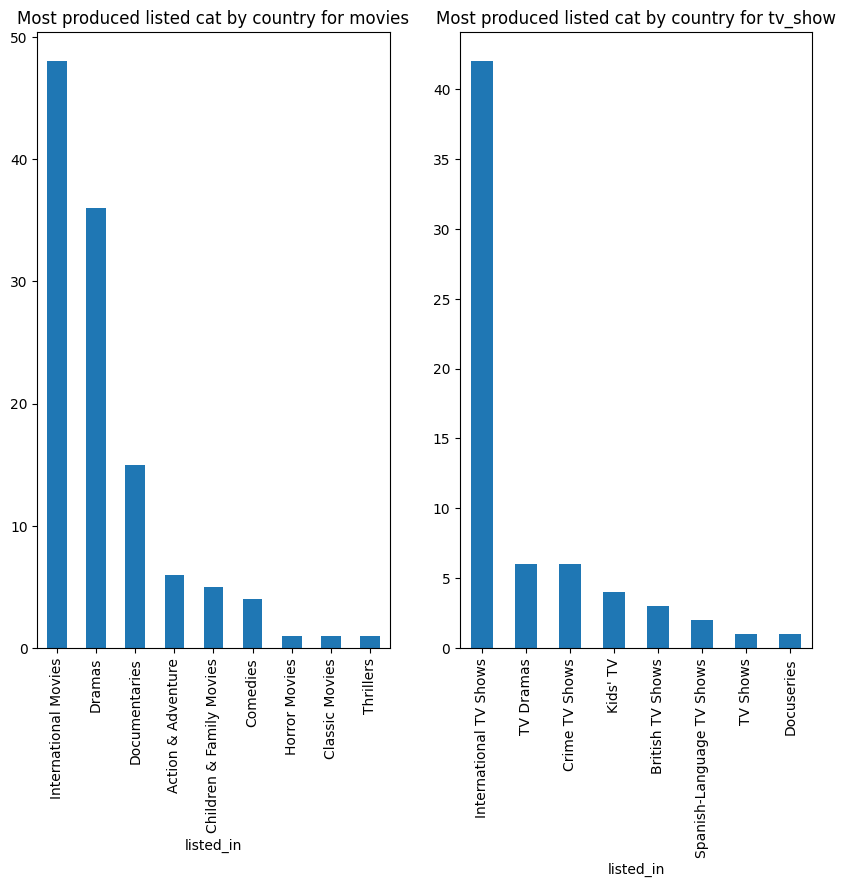

In [81]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )
listed_cat_m=movies.groupby(['country'])['listed_in'].apply(mode).reset_index()
listed_cat_t=tv_show.groupby(['country'])['listed_in'].apply(mode).reset_index()
listed_cat_m['listed_in'].value_counts().sort_values(ascending =False).plot(kind='bar' , ax = axis[0])
axis[0].set_title("Most produced listed cat by country for movies")
listed_cat_t['listed_in'].value_counts().sort_values(ascending =False).plot(kind='bar' , ax = axis[1])
axis[1].set_title("Most produced listed cat by country for tv_show")

1. international movies is produced by all most 48 countries followed by Drama
2. Horror Movies ,Classic Movies ,Thrillers  is produced by just 1 country (they each could be different)        
3. International TV Shows  movies is produced by all most 42 countries followed by TV Dramas
4. TV Shows ,Docuseries is produced by just 1 country (they each could be different)  
5. Netflix should add Horror Movies ,Classic Movies ,Thrillers from different country as we just have these categories one country            

In [82]:
print("below is list of country that product 'Horror Movies' ,'Classic Movies' ,'Thrillers' movies ")
display(listed_cat_m[listed_cat_m['listed_in'].isin(['Horror Movies' ,'Classic Movies' ,'Thrillers'])])
print("below is list of country that product 'TV Shows' ,'Docuseries' ")
display(listed_cat_t[listed_cat_t['listed_in'].isin(['TV Shows' ,'Docuseries'])])

below is list of country that product 'Horror Movies' ,'Classic Movies' ,'Thrillers' movies 


,country,listed_in
26,Dominican Republic,Horror Movies
56,Liechtenstein,Classic Movies
61,Malta,Thrillers


below is list of country that product 'TV Shows' ,'Docuseries' 


,country,listed_in
47,Saudi Arabia,TV Shows
63,Uruguay,Docuseries


In [83]:
listed_cat_m=movies.groupby(['country'])['listed_in'].apply(set).reset_index()
listed_cat_t=tv_show.groupby(['country'])['listed_in'].apply(set).reset_index()
listed_cat_m['n_cat']=listed_cat_m['listed_in'].apply(len)
listed_cat_t['n_cat']=listed_cat_t['listed_in'].apply(len)
print(f"Movies : \n{listed_cat_m['n_cat'].agg(['min' ,'max' ,'mean' ,'median'])}")
print(f"tv show : \n{listed_cat_t['n_cat'].agg(['min' ,'max' ,'mean' ,'median'])}")

Movies : 
min        1.000000
max       20.000000
mean       7.623932
median     7.000000
Name: n_cat, dtype: float64
tv show : 
min        1.000000
max       22.000000
mean       7.953846
median     7.000000
Name: n_cat, dtype: float64


#### (count of movie per country / count of listed in cat per country )

In [84]:
temp=movies.groupby(['country'])['show_id'].apply(set).apply(len).to_frame('movie_per_country_cnt').reset_index()
display(temp.head(2))
y=listed_cat_m.merge(temp)

y['n_cat_per_movie']=y['movie_per_country_cnt']/y['n_cat']
y=y.sort_values('n_cat_per_movie' ,ascending=False)

display(y[(y['n_cat_per_movie'] <1 ) & (y['n_cat_per_movie'] >0.5)].head(2))


y[(y['n_cat_per_movie'] <1 ) & (y['n_cat_per_movie'] >0.5)]['country'].values

,country,movie_per_country_cnt
0,Afghanistan,1
1,Albania,1


,country,listed_in,n_cat,movie_per_country_cnt,n_cat_per_movie
36,Greece,"{Romantic Movies, Independent Movies, Action &...",10,9,0.900000
40,Iceland,"{Horror Movies, Romantic Movies, Thrillers, Ac...",9,8,0.888889


array(['Greece', 'Iceland', 'Serbia', 'Finland', 'Kuwait', 'Vietnam',
       'Portugal', 'Zimbabwe', 'Algeria', 'Croatia', 'Namibia', 'Malta',
       'Iran'], dtype=object)

1. we can suggest netflix to add more movies of different listed_in cat from these countries , if (count of movie per country / count of listed in cat per country ) is above 1 it means we have at least one movie for each category from these country , if less no of cat is more than movies

In [85]:
temp=tv_show.groupby(['country'])['show_id'].apply(set).apply(len).to_frame('movie_per_country_cnt').reset_index()
display(temp.head(2))
y=listed_cat_m.merge(temp)

y['n_cat_per_movie']=y['movie_per_country_cnt']/y['n_cat']
y=y.sort_values('n_cat_per_movie' ,ascending=False)

display(y[(y['n_cat_per_movie'] <1 ) & (y['n_cat_per_movie'] >0.5)].head(2))


y[(y['n_cat_per_movie'] <1 ) & (y['n_cat_per_movie'] >0.5)]['country'].values

,country,movie_per_country_cnt
0,Argentina,20
1,Australia,66


,country,listed_in,n_cat,movie_per_country_cnt,n_cat_per_movie
48,Sweden,"{Romantic Movies, Thrillers, Music & Musicals,...",12,11,0.916667
37,Norway,"{Horror Movies, Children & Family Movies, Roma...",10,9,0.900000


array(['Sweden', 'Norway', 'Belgium', 'Nigeria', 'Lebanon', 'Poland',
       'South Africa', 'New Zealand', 'Netherlands', 'Saudi Arabia'],
      dtype=object)

1. we can suggest netflix to add more tv show of different listed_in cat from these countries , if (count of movie per country / count of listed in cat per country ) is above 1 it means we have at least one movie for each category from these country , if less no of cat is more than movies

Text(0.5, 1.0, 'no of listed cat for tv_show by country')

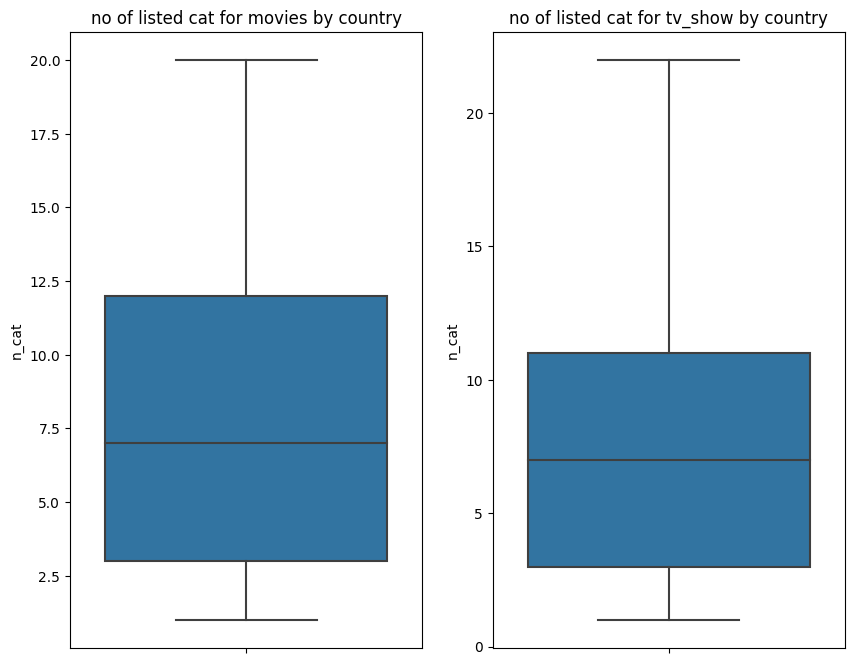

In [87]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )

sns.boxplot(data=listed_cat_m , y='n_cat', ax =axis[0])
axis[0].set_title("no of listed cat for movies by country")
sns.boxplot(data=listed_cat_t, y='n_cat', ax =axis[1])
axis[1].set_title("no of listed cat for tv_show by country")

1. max category movies procuded by any  country is 20 and its united states followed by Australia , france , uk , india 
2. 50 % of contries produce less than 7 category each.
3. max category tv procuded by any  country is 22 and its united states followed by canada ,uk
2. 50 % of contries produce less than 7 category each tv show.


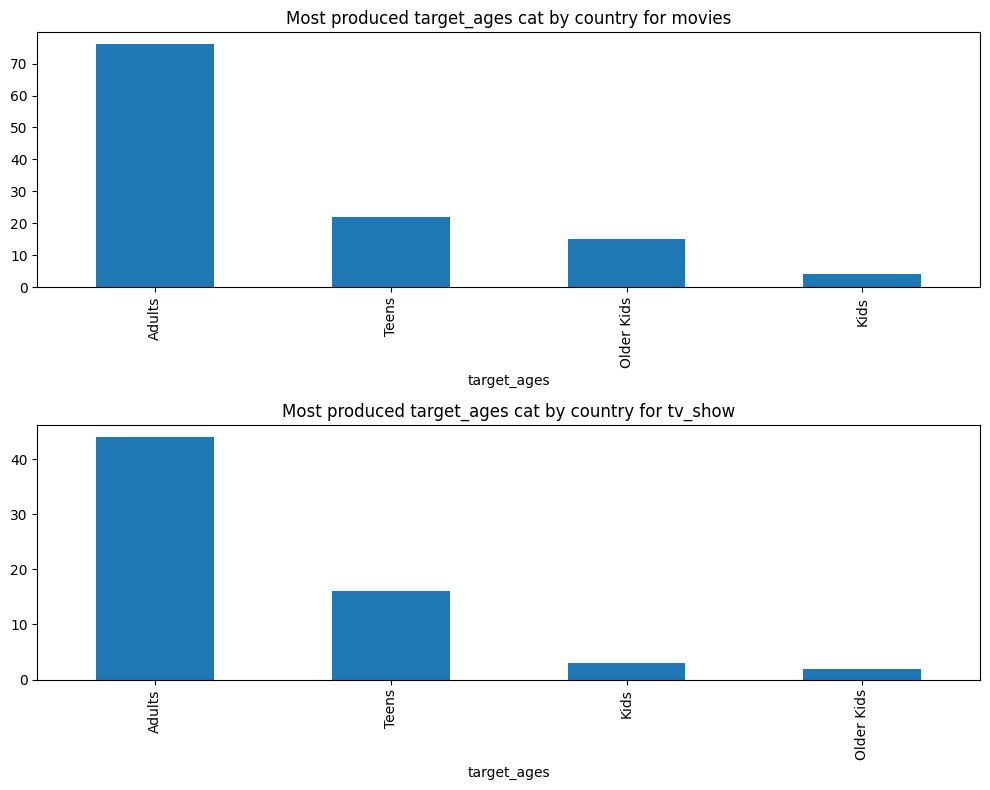

In [88]:
fig , axis =plt.subplots(2,1,figsize =(10,8) )
listed_cat_m=movies.groupby(['country'])['target_ages'].apply(mode).reset_index()
listed_cat_t=tv_show.groupby(['country'])['target_ages'].apply(mode).reset_index()
listed_cat_m['target_ages'].value_counts().sort_values(ascending =False).plot(kind='bar' , ax = axis[0])
axis[0].set_title("Most produced target_ages cat by country for movies")
listed_cat_t['target_ages'].value_counts().sort_values(ascending =False).plot(kind='bar' , ax = axis[1])
axis[1].set_title("Most produced target_ages cat by country for tv_show")
plt.tight_layout()

1. Both for movies and tv_show most popular target age is Adult and teens
2. for tv_Show kids section is kids section is more famous compared to movies

In [89]:
listed_cat_m=movies.groupby(['country'])['target_ages'].apply(set).reset_index()
listed_cat_t=tv_show.groupby(['country'])['target_ages'].apply(set).reset_index()
listed_cat_m['len']=listed_cat_m['target_ages'].apply(len)
listed_cat_t['len']=listed_cat_t['target_ages'].apply(len)
print(f"Movies : \n{listed_cat_m['len'].agg(['min' ,'max' ,'mean' ,'median'])}")
print(f"tv show : \n{listed_cat_t['len'].agg(['min' ,'max' ,'mean' ,'median'])}")

Movies : 
min       1.00000
max       4.00000
mean      2.42735
median    3.00000
Name: len, dtype: float64
tv show : 
min       1.000000
max       4.000000
mean      2.430769
median    2.000000
Name: len, dtype: float64


Text(0.5, 1.0, 'no of target_ages cat for tv_show by country')

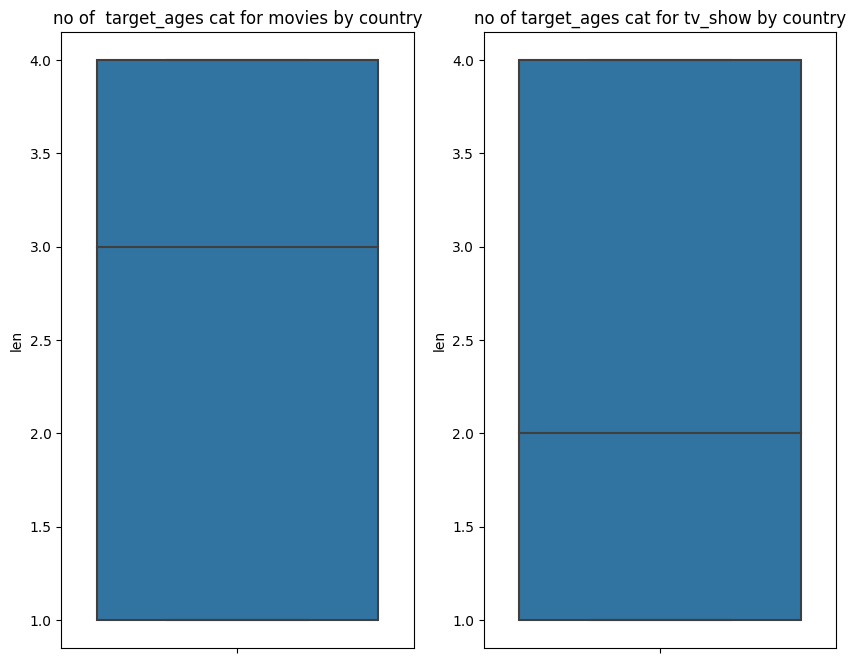

In [90]:
fig , axis =plt.subplots(1,2,figsize =(10,8) )

sns.boxplot(data=listed_cat_m , y='len', ax =axis[0])
axis[0].set_title("no of  target_ages cat for movies by country")
sns.boxplot(data=listed_cat_t, y='len', ax =axis[1])
axis[1].set_title("no of target_ages cat for tv_show by country")

1. for movies and tv_Show target ages stats looks similar, only difference is median
2. for movies median is 3 and for tv_show its for 2 , so more no of countries produce movies which target 3 or more target ages compared to tv show

In [91]:
def release_year_analysis(mov , cat ):
    release_by=mov.groupby([mov['release_year'].dt.year ,cat])['show_id'].apply(set).apply(len).reset_index()
    to_avoid={'cast':['Liam Neeson','David Attenborough'] ,'director':['Martin Scorsese','Noam Murro']}
    most_per_year =[]
    for ry in release_by['release_year'].unique():
        subset =release_by[release_by['release_year']==ry]
        to_avoid_name =to_avoid.get(cat)
        if to_avoid_name is not None:
            subset=subset[~subset[cat].isin(to_avoid_name)]
        if subset.shape[0]<=0:
            continue

        
        temp =subset.sort_values(by ='show_id' ,ascending=False).iloc[0]
        
        most_per_year.append(dict(zip(['year' ,'name' ,'count'] ,temp.values)))
    most_per_year=pd.DataFrame(most_per_year)
    most_per_year=most_per_year.sort_values(by='count' , ascending =False)
    return most_per_year

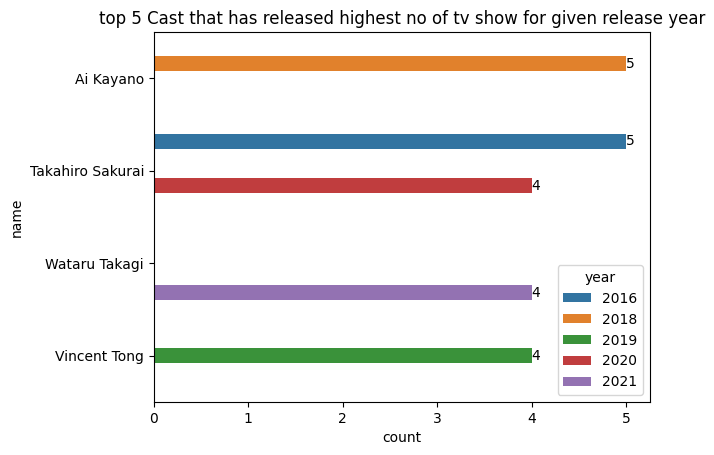

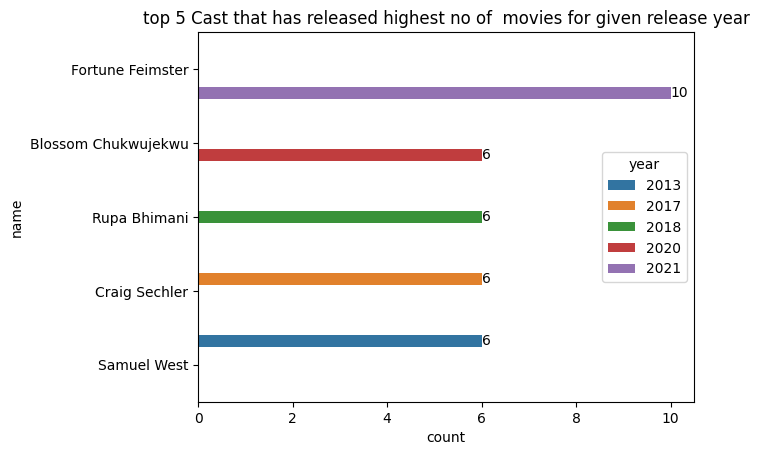

In [92]:
actor_with_highest_release_on_that_release_year_mov =release_year_analysis(movies,'cast')
actor_with_highest_release_on_that_release_year_tv =release_year_analysis(tv_show,'cast')
ax=sns.barplot(data =actor_with_highest_release_on_that_release_year_tv.head(5) , y='name' , x='count', hue ='year')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("top 5 Cast that has released highest no of tv show for given release year")
plt.show()
ax=sns.barplot(data =actor_with_highest_release_on_that_release_year_mov.head(5) , y='name' , x='count', hue ='year')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("top 5 Cast that has released highest no of  movies for given release year")
plt.show()

1. For movie avoiding cast 'Liam Neeson' and for tv_show avoiding 'David Attenborough' as they are poluting count value this is because of imputation 
2. Cast that has released second highest no of tv_show for given release year is Ai
3. Cast that has released second highest no of  movies for given release year is fortune


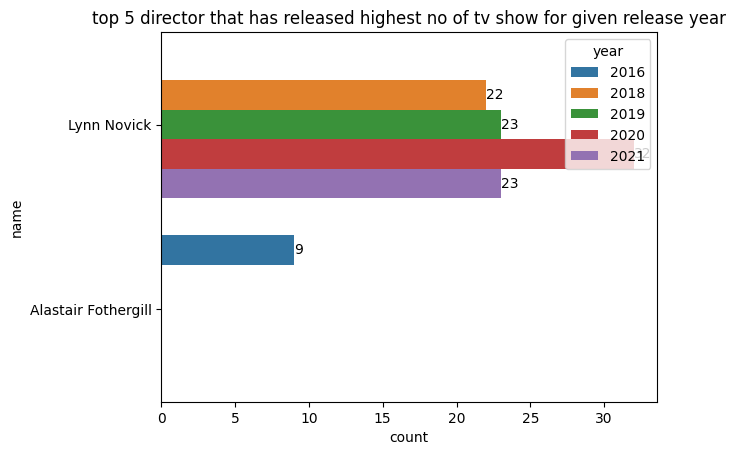

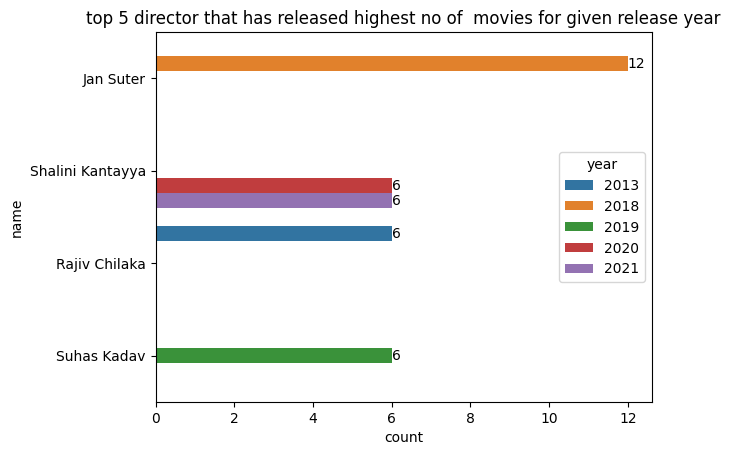

In [93]:
actor_with_highest_release_on_that_release_year_mov =release_year_analysis(movies,'director')
actor_with_highest_release_on_that_release_year_tv =release_year_analysis(tv_show,'director')
ax=sns.barplot(data =actor_with_highest_release_on_that_release_year_tv.head(5) , y='name' , x='count', hue ='year')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("top 5 director that has released highest no of tv show for given release year")
plt.show()
ax=sns.barplot(data =actor_with_highest_release_on_that_release_year_mov.head(5) , y='name' , x='count', hue ='year')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("top 5 director that has released highest no of  movies for given release year")
plt.show()

1. For movie avoiding director 'Martin Scorsese' and for tv_show avoiding 'Noam Murro' as they are poluting count value this is because of imputation 
2. Cast that has released second highest no of tv_show for given release year is lynn
3. Cast that has released second highest no of  movies for given release year is jan


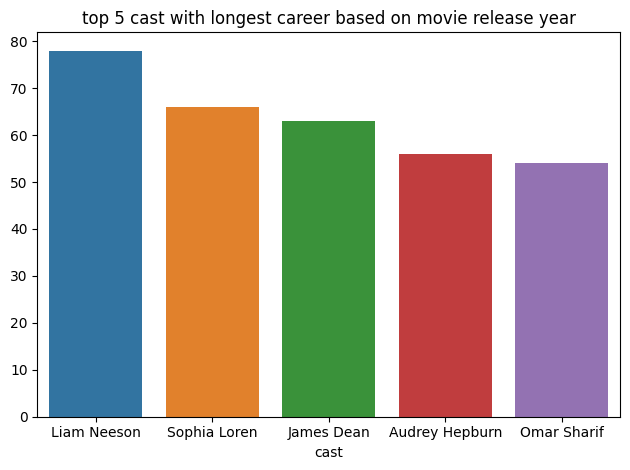

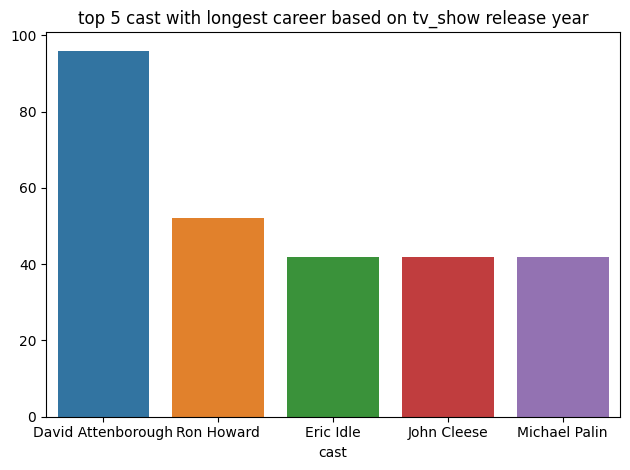

In [94]:
cast_with_longest_career=movies.groupby('cast')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5 cast with longest career based on movie release year")
plt.tight_layout()
plt.show()

cast_with_longest_career=tv_show.groupby('cast')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5 cast with longest career based on tv_show release year")
plt.tight_layout()
plt.show()

1. top  cast with longest career based on movie release year liam and sophie
2. top  cast with longest career based on tv_show release year david and ron

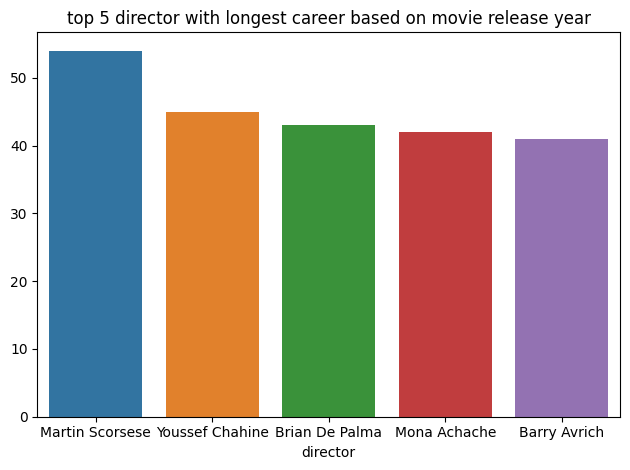

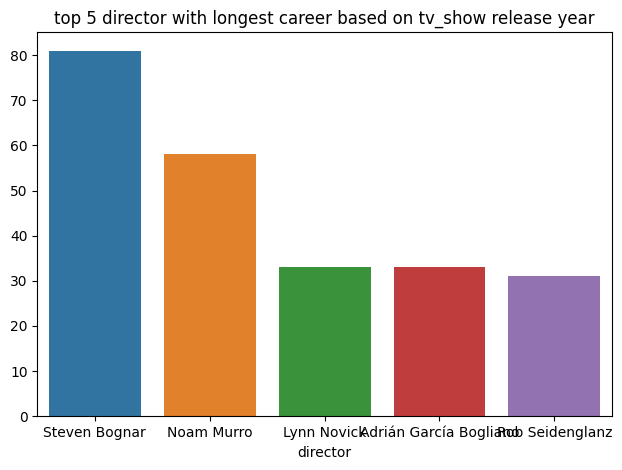

In [95]:
cast_with_longest_career=movies.groupby('director')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5 director with longest career based on movie release year")
plt.tight_layout()
plt.show()

cast_with_longest_career=tv_show.groupby('director')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5 director with longest career based on tv_show release year")
plt.tight_layout()
plt.show()

1. top  director with longest career based on movie release year Martin and youssef
2. top  director with longest career based on tv_show release year steven and noam

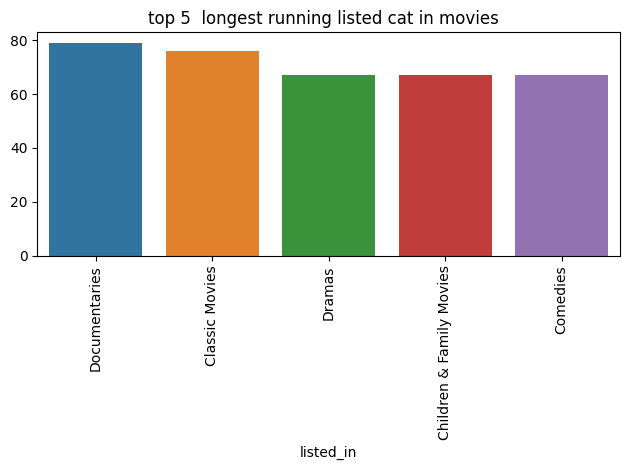

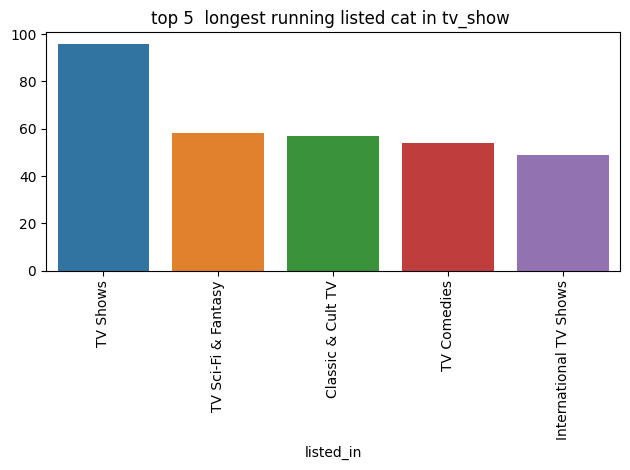

In [96]:
cast_with_longest_career=movies.groupby('listed_in')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5  longest running listed cat in movies  ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cast_with_longest_career=tv_show.groupby('listed_in')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5  longest running listed cat in tv_show ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Documentries type listed cat movie has been running from last 80+ year 
2. Tv show type type listed cat has been running from last 90+ year for tv_show

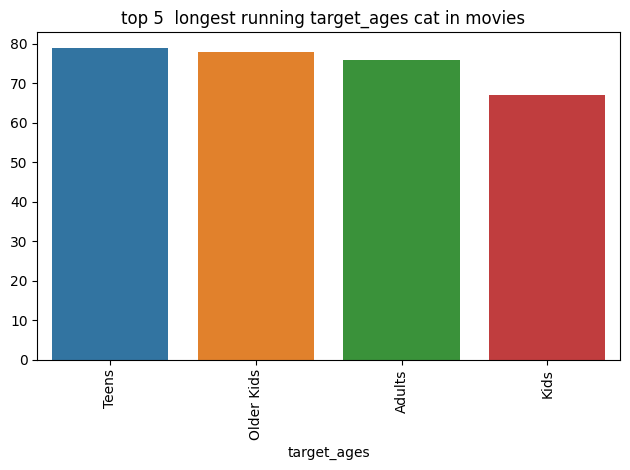

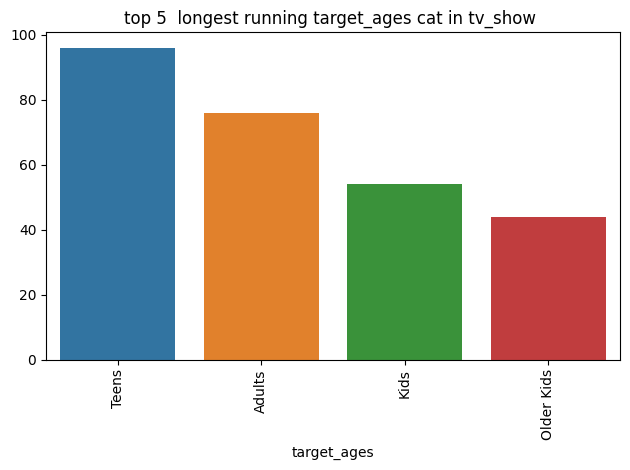

In [97]:
cast_with_longest_career=movies.groupby('target_ages')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5  longest running target_ages cat in movies  ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

cast_with_longest_career=tv_show.groupby('target_ages')['release_year'].agg(['min' ,'max']).apply(lambda x :(x['max']-x['min']).days//(365) ,axis=1).sort_values(ascending=False)
sns.barplot(x=cast_with_longest_career.head(5).index  , y=cast_with_longest_career.head(5))
plt.title("top 5  longest running target_ages cat in tv_show ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. for both movie and tv_show teens cat has been produced for longest time.


Recommendaions


1. most famous movies duration is 90-110 min and for tv_show its 1 season
2. 2018  released movies are numerous in platform , netflix should add block buster from other released year too 
3. 2020/2019  released tv_Show are numerous in platform , netflix should good rated tv_show pre 2015.
4. Best month to add movie in platform is july for movies and december for tv_shows 
5. Best quarter to add movie in platform is q3 for movies and  tv_shows 
6. Best day of week  to add movie in platform is friday for movies and  tv_shows 
7. In tv_show section kids section popularity is increasing yoy, so netflix can add more kids tv show
8. Netflix can add more Bruce Willis movie for Adult target age 
9. Netflix can add more Anupam Kher,Shah Rukh Khan	movie for teen target age
10. More movies from director Martin Scorsese ,Umesh Mehra,Jan Suter can be added  from teens and Adult target age 
11. As kid section popularity is increasing netflix tv_show can add more number of movies form director [Noam Murro ,Bhavik Thakore		
	,Thomas Astruc]
12. Netflix should add Horror Movies ,Classic Movies ,Thrillers from different country as we just have these categories one country
13.  we can suggest netflix to add more movies of different listed_in cat from these 
'Greece', 'Iceland', 'Serbia', 'Finland', 'Kuwait', 'Vietnam',
       'Portugal', 'Zimbabwe', 'Algeria', 'Croatia', 'Namibia', 'Malta',
       'Iran'countries , if (count of movie per country / count of listed in cat per country ) ratio  is above 1 it means we have at least one movie for each category from these country , if less no of cat is more than movies
14.  we can suggest netflix to add more tv show of different listed_in cat from these ['Sweden', 'Norway', 'Belgium', 'Nigeria', 'Lebanon', 'Poland',
       'South Africa', 'New Zealand', 'Netherlands', 'Saudi Arabia']
       countries , if (count of movie per country / count of listed in cat per country ) is above 1 it means we have at least one movie for each category from these country , if less no of cat is more than movies

In [99]:
df = pd.DataFrame(dict(age=[5, 6, np.nan],
                       born=[pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                       name=['Alfred', 'Batman', ''],))

In [102]:
df[df.isna().any(axis=1)]

,age,born,name
0,5.0,NaT,Alfred
2,NaN,1940-04-25,


In [103]:
df.isna().any(axis=1)

0     True
1    False
2     True
dtype: bool

In [104]:
def is_null(x): 
   return sum(x.isnull())

In [105]:
df.apply(is_null, axis=1)

0    1
1    0
2    1
dtype: int64

In [108]:
import pandas as pd

data = {
    'name': ['Jim', 'Clarke', 'Kent', 'Mark'],
    'username': ['itsjimhere', 'clark002', 'itskentment', 'markyoumustknow'],
    'userid': [20, 10, 86, 21]
}

df = pd.DataFrame(data)

In [119]:
def check(name):
    print(name.shape , type(x))
    return True
df[~(df.apply(lambda x:check(x), axis=0))]['userid']

(4,) <class 'pandas.core.frame.DataFrame'>
(4,) <class 'pandas.core.frame.DataFrame'>
(4,) <class 'pandas.core.frame.DataFrame'>


C:\Users\adity\AppData\Local\Temp\ipykernel_14344\3703741314.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~(df.apply(lambda x:check(x), axis=0))]['userid']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [122]:
df.apply(lambda x:check(x), axis=1)

(3,) <class 'pandas.core.frame.DataFrame'>
(3,) <class 'pandas.core.frame.DataFrame'>
(3,) <class 'pandas.core.frame.DataFrame'>
(3,) <class 'pandas.core.frame.DataFrame'>


0    True
1    True
2    True
3    True
dtype: bool

In [124]:
import pandas as pd

data = {
    'cust_id': [101, 102, 103, 104],
    'name': ['rick', 'morty', 'pickle', 'jerry'],
}

df = pd.DataFrame(data)

In [127]:
df.isin({'cust_id': [101, 102]})

,cust_id,name
0,True,False
1,True,False
2,False,False
3,False,False


In [131]:
import numpy as np
arr = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])

In [133]:
np.hstack((arr, arr[:, 0])).shape==(3, 4)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [137]:
import numpy as np
arr = 2 * np.arange(0,2,0.5)
if arr <= 0.6:
    print("condition satisfies")
else:
    print("condition doesn't satisfy")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [138]:
import numpy as np
p = np.array([[0], [10], [20]])
q = np.array([10, 11, 12]) 
print((p + q)[1][1]) 

21


In [144]:
np.linspace(1, 5,2)

array([1., 5.])

In [147]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])

a[:,None].shape , b.shape

((4, 1), (3,))

In [175]:
x = np.arange(1 ,100)

In [176]:
x=x.reshape(3,33)

In [177]:
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33],
       [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66],
       [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
        83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
        99]])

In [171]:
split=np.vsplit(x ,3)

In [173]:
split


[array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
         33]]),
 array([[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
         50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
         66]]),
 array([[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
         83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
         99]])]

In [172]:
for x in split:
    print(x.sum())

561
1650
2739
